## DATASET: Load in the data

In [1]:
DATASET = 'datasets'

### Function for loading data - do not change

In [3]:
import random
import string
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import datetime

def load_data(DATASET):
    dataset_list = ['datasets']
    if DATASET in dataset_list:
        email_data = pd.read_csv('./' + DATASET + '/email_data.csv', parse_dates=True, index_col=0)
        file_data = pd.read_csv('./' + DATASET + '/file_data.csv', parse_dates=True, index_col=0)
        web_data = pd.read_csv('./' + DATASET + '/web_data.csv', parse_dates=True, index_col=0)
        login_data = pd.read_csv('./' + DATASET + '/login_data.csv', parse_dates=True, index_col=0)
        usb_data = pd.read_csv('./' + DATASET + '/usb_data.csv', parse_dates=True, index_col=0)
        employee_data = pd.read_csv('./' + DATASET + '/employee_data.csv', index_col=0)
        
        email_data['datetime'] = pd.to_datetime(email_data['datetime'])
        file_data['datetime'] = pd.to_datetime(file_data['datetime'])
        web_data['datetime'] = pd.to_datetime(web_data['datetime'])
        login_data['datetime'] = pd.to_datetime(login_data['datetime'])
        usb_data['datetime'] = pd.to_datetime(usb_data['datetime'])
    else:
        print ("DATASET variable not defined - please refer to Blackboard for DATASET name")
        return
    return employee_data, login_data, usb_data, web_data, file_data, email_data

employee_data, login_data, usb_data, web_data, file_data, email_data = load_data(DATASET)

### The following code samples may be useful to aid your investigation

In [4]:
# This shows the employee_data DataFrame
employee_data

user      role                email     pc
0    usr-uda  Security  usr-uda@uwetech.com    pc0
1    usr-hhe  Security  usr-hhe@uwetech.com    pc1
2    usr-vxr   Finance  usr-vxr@uwetech.com    pc2
3    usr-nba   Finance  usr-nba@uwetech.com    pc3
4    usr-hqt   Finance  usr-hqt@uwetech.com    pc4
..       ...       ...                  ...    ...
245  usr-jwo   Finance  usr-jwo@uwetech.com  pc245
246  usr-hiz  Security  usr-hiz@uwetech.com  pc246
247  usr-svz  Services  usr-svz@uwetech.com  pc247
248  usr-ndr        HR  usr-ndr@uwetech.com  pc248
249  usr-eie   Finance  usr-eie@uwetech.com  pc249

[250 rows x 4 columns]

In [5]:
# This shows the login_data DataFrame
login_data

datetime     user  action     pc
0      2022-01-01 00:00:30  usr-lfl   login   pc18
1      2022-01-01 00:09:21  usr-vul   login   pc54
2      2022-01-01 00:14:04  usr-jmr   login  pc137
3      2022-01-01 00:15:06  usr-hvd   login  pc110
4      2022-01-01 00:15:57  usr-ebj   login  pc108
...                    ...      ...     ...    ...
151995 2022-10-31 23:40:34  usr-bsx  logoff   pc79
151996 2022-10-31 23:41:08  usr-gvw  logoff   pc87
151997 2022-10-31 23:43:11  usr-hfz  logoff  pc112
151998 2022-10-31 23:46:29  usr-dmi  logoff   pc17
151999 2022-10-31 23:57:44  usr-ypo  logoff  pc203

[152000 rows x 4 columns]

In [ ]:
# This shows how to filter the login_data DataFrame by a particular username
login_data[login_data['user']=='usr-nic']

datetime     user  action     pc
36     2022-01-01 03:05:21  usr-nic   login  pc181
458    2022-01-01 20:50:55  usr-nic  logoff  pc181
510    2022-01-02 00:55:34  usr-nic   login  pc181
963    2022-01-02 21:17:28  usr-nic  logoff  pc181
1122   2022-01-03 06:46:55  usr-nic   login  pc181
...                    ...      ...     ...    ...
150987 2022-10-29 23:00:00  usr-nic  logoff  pc181
151247 2022-10-30 10:52:27  usr-nic   login  pc181
151473 2022-10-30 21:50:44  usr-nic  logoff  pc181
151502 2022-10-31 00:14:21  usr-nic   login  pc181
151961 2022-10-31 21:09:44  usr-nic  logoff  pc181

[608 rows x 4 columns]

In [ ]:
# This shows how to filter the login_data DataFrame by a particular set of usernames within a list
login_data[login_data['user'].isin(['usr-nic'])]

datetime     user  action     pc
36     2022-01-01 03:05:21  usr-nic   login  pc181
458    2022-01-01 20:50:55  usr-nic  logoff  pc181
510    2022-01-02 00:55:34  usr-nic   login  pc181
963    2022-01-02 21:17:28  usr-nic  logoff  pc181
1122   2022-01-03 06:46:55  usr-nic   login  pc181
...                    ...      ...     ...    ...
150987 2022-10-29 23:00:00  usr-nic  logoff  pc181
151247 2022-10-30 10:52:27  usr-nic   login  pc181
151473 2022-10-30 21:50:44  usr-nic  logoff  pc181
151502 2022-10-31 00:14:21  usr-nic   login  pc181
151961 2022-10-31 21:09:44  usr-nic  logoff  pc181

[608 rows x 4 columns]

In [6]:
# all_roles is an array/list of all job roles that are within our DataFrame
all_roles = employee_data['role'].unique()
all_roles

array(['Security', 'Finance', 'Legal', 'HR', 'Services', 'Technical',
       'Director'], dtype=object)

### Question 1: For all Finance staff members during the month of January, show the distribution of when users logon and logoff by hour using one or more Bar Charts, and report the most common login and logoff time for this role.

*Hint: Once you have filtered the data to only Finance staff in January, count the number of logons and logoffs that occur in each hour of the day.*


In [ ]:
finance_data = employee_data[employee_data['role'] == 'Finance']

# Merge login_data with finance_data based on the 'user' column
merged_data = pd.merge(login_data, finance_data[['user']], on='user', how='inner')

In [ ]:
# Convert 'datetime' column to datetime type
merged_data['datetime'] = pd.to_datetime(merged_data['datetime'])
# Extract month and hour information
merged_data['month'] = merged_data['datetime'].dt.month
merged_data['hour'] = merged_data['datetime'].dt.hour

In [ ]:
merged_data

datetime     user  action     pc  month  hour
0     2022-01-01 07:08:20  usr-uyp   login  pc228      1     7
1     2022-01-01 18:26:41  usr-uyp  logoff  pc228      1    18
2     2022-01-02 09:48:00  usr-uyp   login  pc228      1     9
3     2022-01-02 17:53:02  usr-uyp  logoff  pc228      1    17
4     2022-01-03 07:48:15  usr-uyp   login  pc228      1     7
...                   ...      ...     ...    ...    ...   ...
17627 2022-10-29 18:04:17  usr-eqp  logoff   pc32     10    18
17628 2022-10-30 09:24:56  usr-eqp   login   pc32     10     9
17629 2022-10-30 17:25:55  usr-eqp  logoff   pc32     10    17
17630 2022-10-31 07:00:44  usr-eqp   login   pc32     10     7
17631 2022-10-31 18:25:02  usr-eqp  logoff   pc32     10    18

[17632 rows x 6 columns]

Text(0, 0.5, 'Login Count')

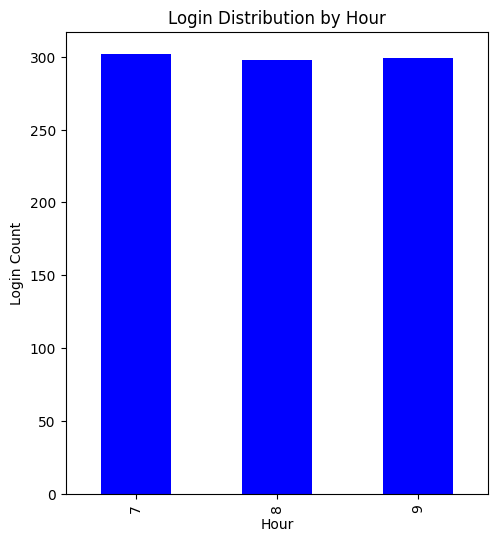

In [ ]:
# Filter data for January
january_data = merged_data[merged_data['month'] == 1]

# Plot login and logoff distribution by hour
plt.figure(figsize=(12, 6))

# Plot login distribution
plt.subplot(1, 2, 1)
login_counts = january_data[january_data['action'] == 'login']['hour'].value_counts().sort_index()
login_counts.plot(kind='bar', color='blue')
plt.title('Login Distribution by Hour')
plt.xlabel('Hour')
plt.ylabel('Login Count')


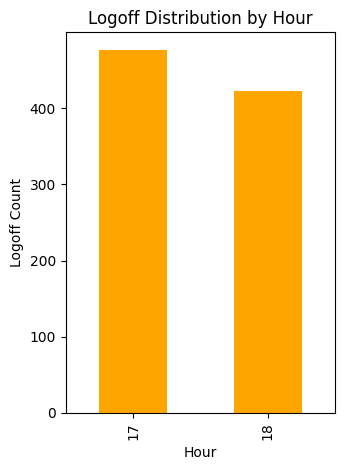

In [ ]:
# Plot logoff distribution
plt.subplot(1, 2, 2)
logoff_counts = january_data[january_data['action'] == 'logoff']['hour'].value_counts().sort_index()
logoff_counts.plot(kind='bar', color='orange')
plt.title('Logoff Distribution by Hour')
plt.xlabel('Hour')
plt.ylabel('Logoff Count')

plt.tight_layout()
plt.show()

In [ ]:
# Report the most common login and logoff time for Finance role
most_common_login_time = login_counts.idxmax()
most_common_logoff_time = logoff_counts.idxmax()

print(f'Most common login time: {most_common_login_time}:00')
print(f'Most common logoff time: {most_common_logoff_time}:00')

Most common login time: 7:00
Most common logoff time: 17:00


### Question 2: Plot a multi-line chart that shows the logon and logoff times during the month of January for the user of pc42.

In [ ]:
# Convert 'datetime' column to datetime type
login_data['datetime'] = pd.to_datetime(login_data['datetime'])

# Extract month information
login_data['month'] = login_data['datetime'].dt.month

# Filter data for January and pc42
pc42_data = login_data[(login_data['month'] == 1) & (login_data['pc'] == 'pc42')]


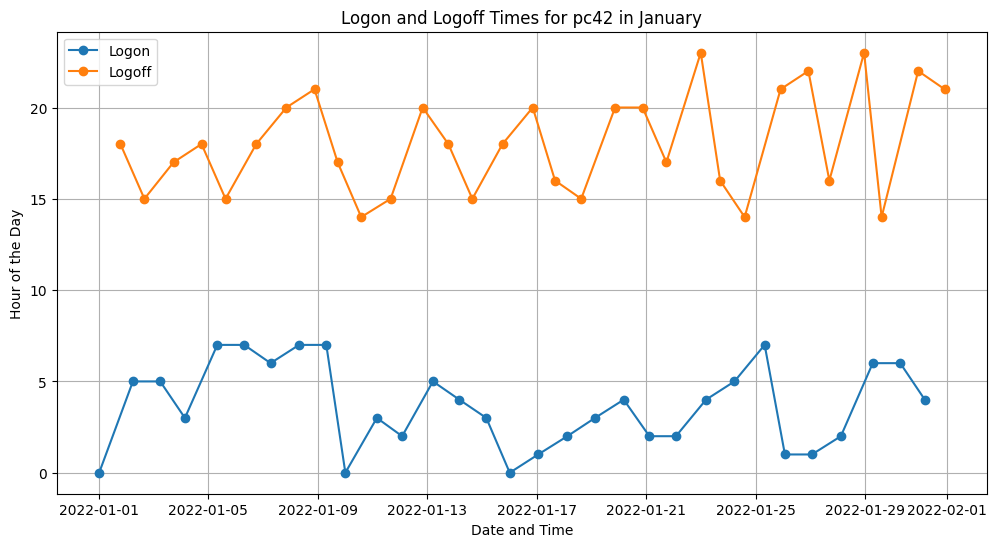

In [ ]:
# Plot logon and logoff times for pc42
plt.figure(figsize=(12, 6))

plt.plot(pc42_data[pc42_data['action'] == 'login']['datetime'],
         pc42_data[pc42_data['action'] == 'login']['datetime'].dt.hour,
         label='Logon', marker='o')

plt.plot(pc42_data[pc42_data['action'] == 'logoff']['datetime'],
         pc42_data[pc42_data['action'] == 'logoff']['datetime'].dt.hour,
         label='Logoff', marker='o')

plt.title('Logon and Logoff Times for pc42 in January')
plt.xlabel('Date and Time')
plt.ylabel('Hour of the Day')
plt.legend()
plt.grid(True)
plt.show()

### Question 3: Use a node-link graph to show all emails sent by Security staff on January 5th 2022.

In [ ]:
employee_data

user      role                email     pc
0    usr-uda  Security  usr-uda@uwetech.com    pc0
1    usr-hhe  Security  usr-hhe@uwetech.com    pc1
2    usr-vxr   Finance  usr-vxr@uwetech.com    pc2
3    usr-nba   Finance  usr-nba@uwetech.com    pc3
4    usr-hqt   Finance  usr-hqt@uwetech.com    pc4
..       ...       ...                  ...    ...
245  usr-jwo   Finance  usr-jwo@uwetech.com  pc245
246  usr-hiz  Security  usr-hiz@uwetech.com  pc246
247  usr-svz  Services  usr-svz@uwetech.com  pc247
248  usr-ndr        HR  usr-ndr@uwetech.com  pc248
249  usr-eie   Finance  usr-eie@uwetech.com  pc249

[250 rows x 4 columns]

In [ ]:
email_data

datetime               sender            recipient
0       2022-01-01 00:11:41.255174  usr-lfl@uwetech.com  usr-mvr@uwetech.com
1       2022-01-01 00:11:43.988351  usr-vul@uwetech.com  usr-vxr@uwetech.com
2       2022-01-01 00:19:56.302656  usr-lfl@uwetech.com  usr-tgw@uwetech.com
3       2022-01-01 00:20:23.641053  usr-hvd@uwetech.com  usr-qjv@uwetech.com
4       2022-01-01 00:20:48.532242  usr-ebj@uwetech.com  usr-tgw@uwetech.com
...                            ...                  ...                  ...
3717746 2022-10-31 23:21:34.266269  usr-stu@uwetech.com  usr-ocw@uwetech.com
3717747 2022-10-31 23:23:56.265237  usr-kdj@uwetech.com  usr-gok@uwetech.com
3717748 2022-10-31 23:39:20.363999  usr-gvw@uwetech.com  usr-orw@uwetech.com
3717749 2022-10-31 23:40:36.468829  usr-gvw@uwetech.com  usr-zwd@uwetech.com
3717750 2022-10-31 23:46:24.684210  usr-ypo@uwetech.com  usr-xvg@uwetech.com

[3717751 rows x 3 columns]

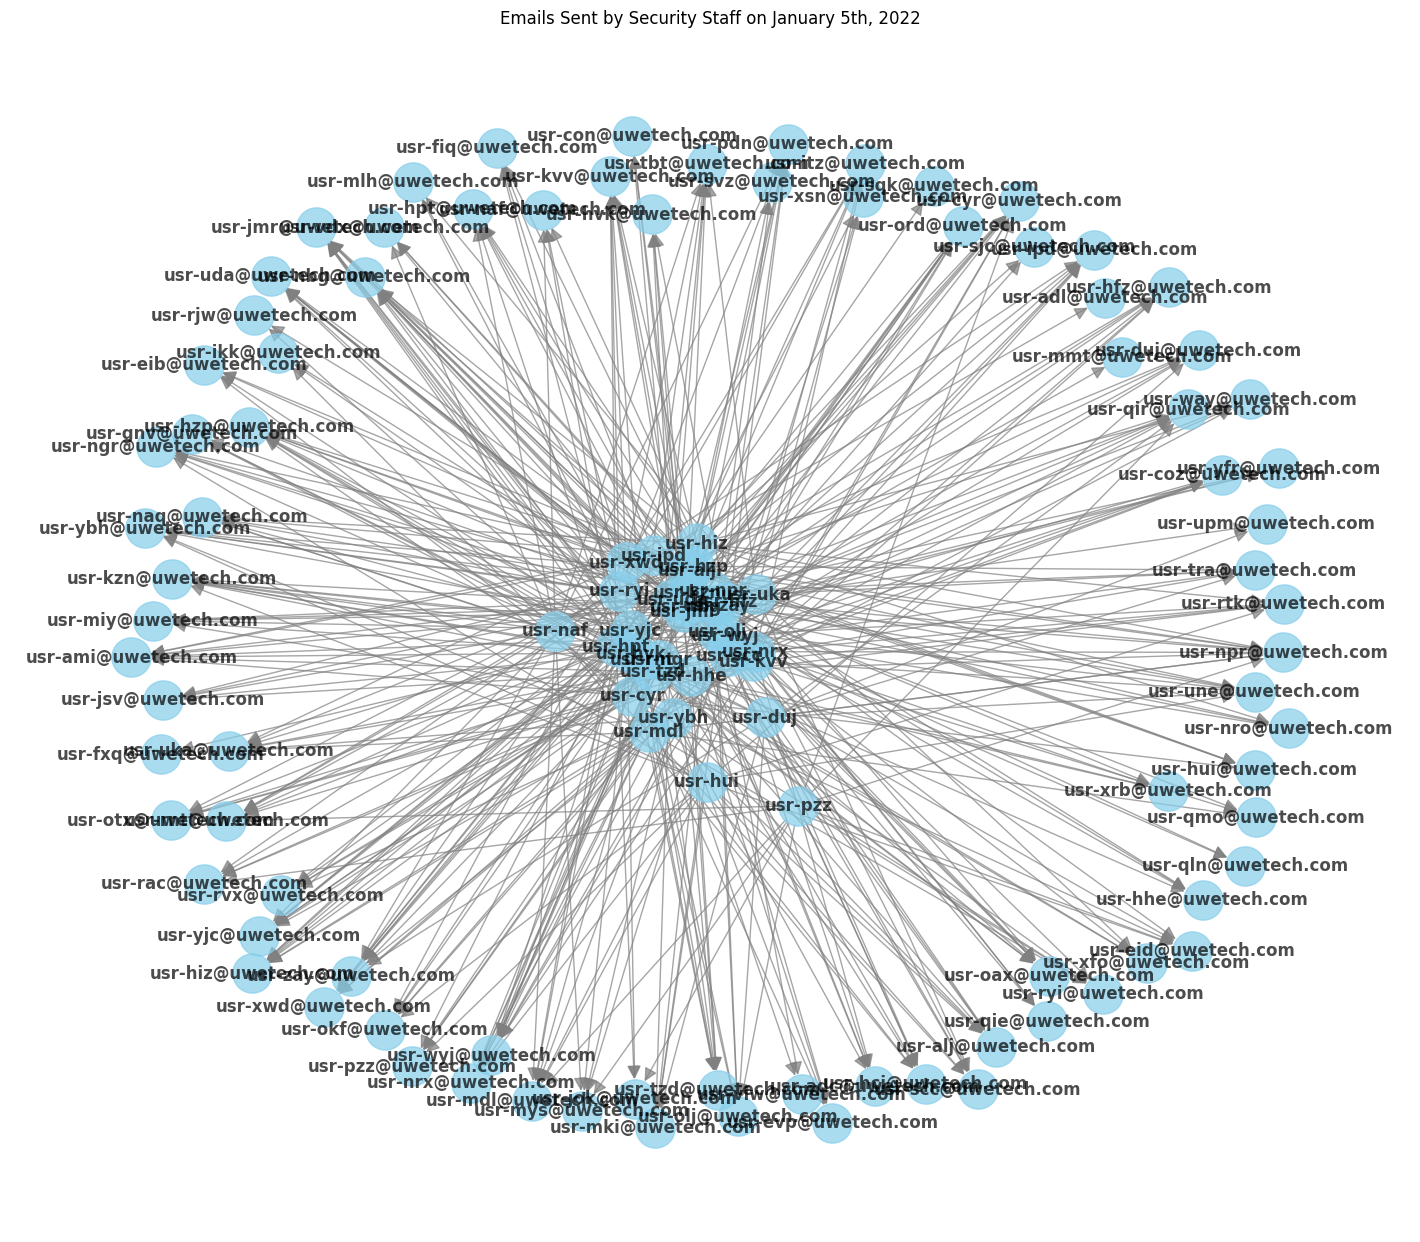

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

def preprocess_email_data(email_data):
    email_data['datetime'] = pd.to_datetime(email_data['datetime'])
    email_data['formatted_date'] = email_data['datetime'].dt.strftime('%Y-%m-%d')
    email_data['sender_user'] = email_data['sender'].str.split('@').str[0]
    return email_data

def merge_employee_and_email_data(email_data, employee_data):
    return pd.merge(email_data, employee_data, left_on='sender_user', right_on='user', how='inner')

def create_directed_graph(filtered_data):
    G = nx.DiGraph()
    for index, row in filtered_data.iterrows():
        G.add_edge(row['sender_user'], row['recipient'])
    
    return G

def plot_email_graph(G):
    name_mapping = {node: node.split('-')[1] for node in G.nodes()}
    edge_name_mapping = {(source, target): (source.split('-')[1], target.split('-')[1]) for source, target in G.edges()}

    G_new = nx.relabel_nodes(G, name_mapping)
    G_new = nx.create_empty_copy(G_new)

    for source, target in G.edges():
        G_new.add_edge(name_mapping[source], name_mapping[target])

    plt.figure(figsize=(14, 12))
    pos = nx.spring_layout(G, seed=42) 
    nx.draw(G, pos, with_labels=True, font_weight='bold', node_color='skyblue', node_size=800, edge_color='gray', alpha=0.7, arrowsize=20)
    plt.title('Emails Sent by Security Staff on January 5th, 2022')
    plt.show()

def get_security_emails_connections(filtered_data):
    connections_list = []
    for index, row in filtered_data.iterrows():
        sender_user = row['sender_user'].split('-')[1]
        recipient_user = row['recipient'].split('-')[1]
        connections_list.append((sender_user, recipient_user))

    return connections_list

def plot_connections_per_user(filtered_data):
    connections_list = []
    for index, row in filtered_data.iterrows():
        sender_user = row['sender_user'].split('-')[1]
        recipient_user = row['recipient'].split('-')[1]
        connections_list.append((sender_user, recipient_user))

    connections_df = pd.DataFrame(connections_list, columns=['Sender', 'Recipient'])
    connections_count = connections_df['Sender'].value_counts()

    plt.figure(figsize=(12, 8))
    connections_count.plot(kind='bar', color='skyblue')
    plt.title('Number of Connections per User')
    plt.xlabel('User')
    plt.ylabel('Number of Connections')
    plt.show()

# Example usage:
email_data = preprocess_email_data(email_data)
security_data = merge_employee_and_email_data(email_data, employee_data)

# Example for creating a directed graph
role = 'Security'
date = '2022-01-05'
filtered_data = security_data[(security_data['role'] == role) & (security_data['formatted_date'] == date)]
G = create_directed_graph(filtered_data)
plot_email_graph(G)

In [ ]:
# Example for getting security emails connections
connections = get_security_emails_connections(filtered_data)
print(connections)

[('ngr', 'coz@uwetech.com'), ('ngr', 'xwd@uwetech.com'), ('ngr', 'eib@uwetech.com'), ('ngr', 'ord@uwetech.com'), ('ngr', 'jmr@uwetech.com'), ('ngr', 'hhe@uwetech.com'), ('ngr', 'yjc@uwetech.com'), ('ngr', 'hzp@uwetech.com'), ('ngr', 'tzd@uwetech.com'), ('ngr', 'tzd@uwetech.com'), ('ngr', 'hci@uwetech.com'), ('ngr', 'rnt@uwetech.com'), ('ngr', 'tbt@uwetech.com'), ('ngr', 'kzn@uwetech.com'), ('ngr', 'evp@uwetech.com'), ('ngr', 'alj@uwetech.com'), ('ngr', 'mlh@uwetech.com'), ('ngr', 'way@uwetech.com'), ('ngr', 'nrx@uwetech.com'), ('jmr', 'ord@uwetech.com'), ('jmr', 'nrx@uwetech.com'), ('jmr', 'miy@uwetech.com'), ('jmr', 'evp@uwetech.com'), ('jmr', 'uda@uwetech.com'), ('jmr', 'evp@uwetech.com'), ('jmr', 'tzd@uwetech.com'), ('jmr', 'evp@uwetech.com'), ('jmr', 'nbg@uwetech.com'), ('jmr', 'hvk@uwetech.com'), ('jmr', 'adc@uwetech.com'), ('jmr', 'yfr@uwetech.com'), ('jmr', 'evp@uwetech.com'), ('jmr', 'hfz@uwetech.com'), ('jmr', 'pdn@uwetech.com'), ('jmr', 'rac@uwetech.com'), ('ipd', 'wyj@uwetec

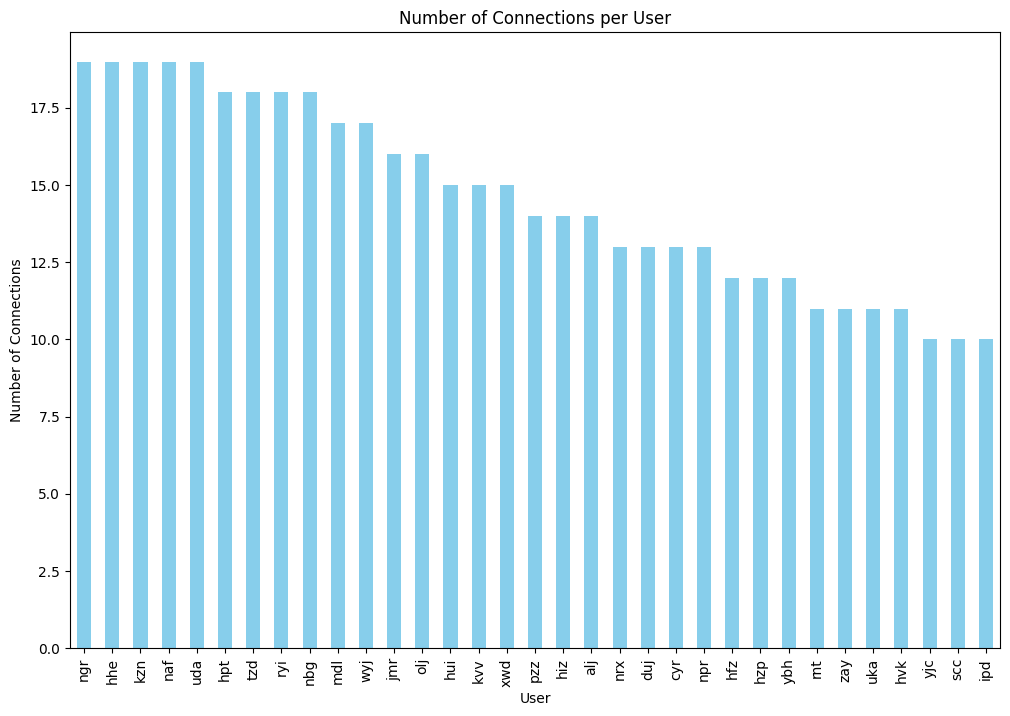

In [ ]:
# Example for plotting connections per user
plot_connections_per_user(filtered_data)

### Question 4: Extend the above, now showing a node for every possible user. The edge connections should be as above, for emails sent by Security staff on 5th January 2022.

c:\Python39\lib\site-packages\networkx\drawing\nx_pylab.py:304: UserWarning: 

The arrowsize keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default value for arrowsize.
Note that using FancyArrowPatches may be slow for large graphs.

  draw_networkx_edges(G, pos, arrows=arrows, **edge_kwds)


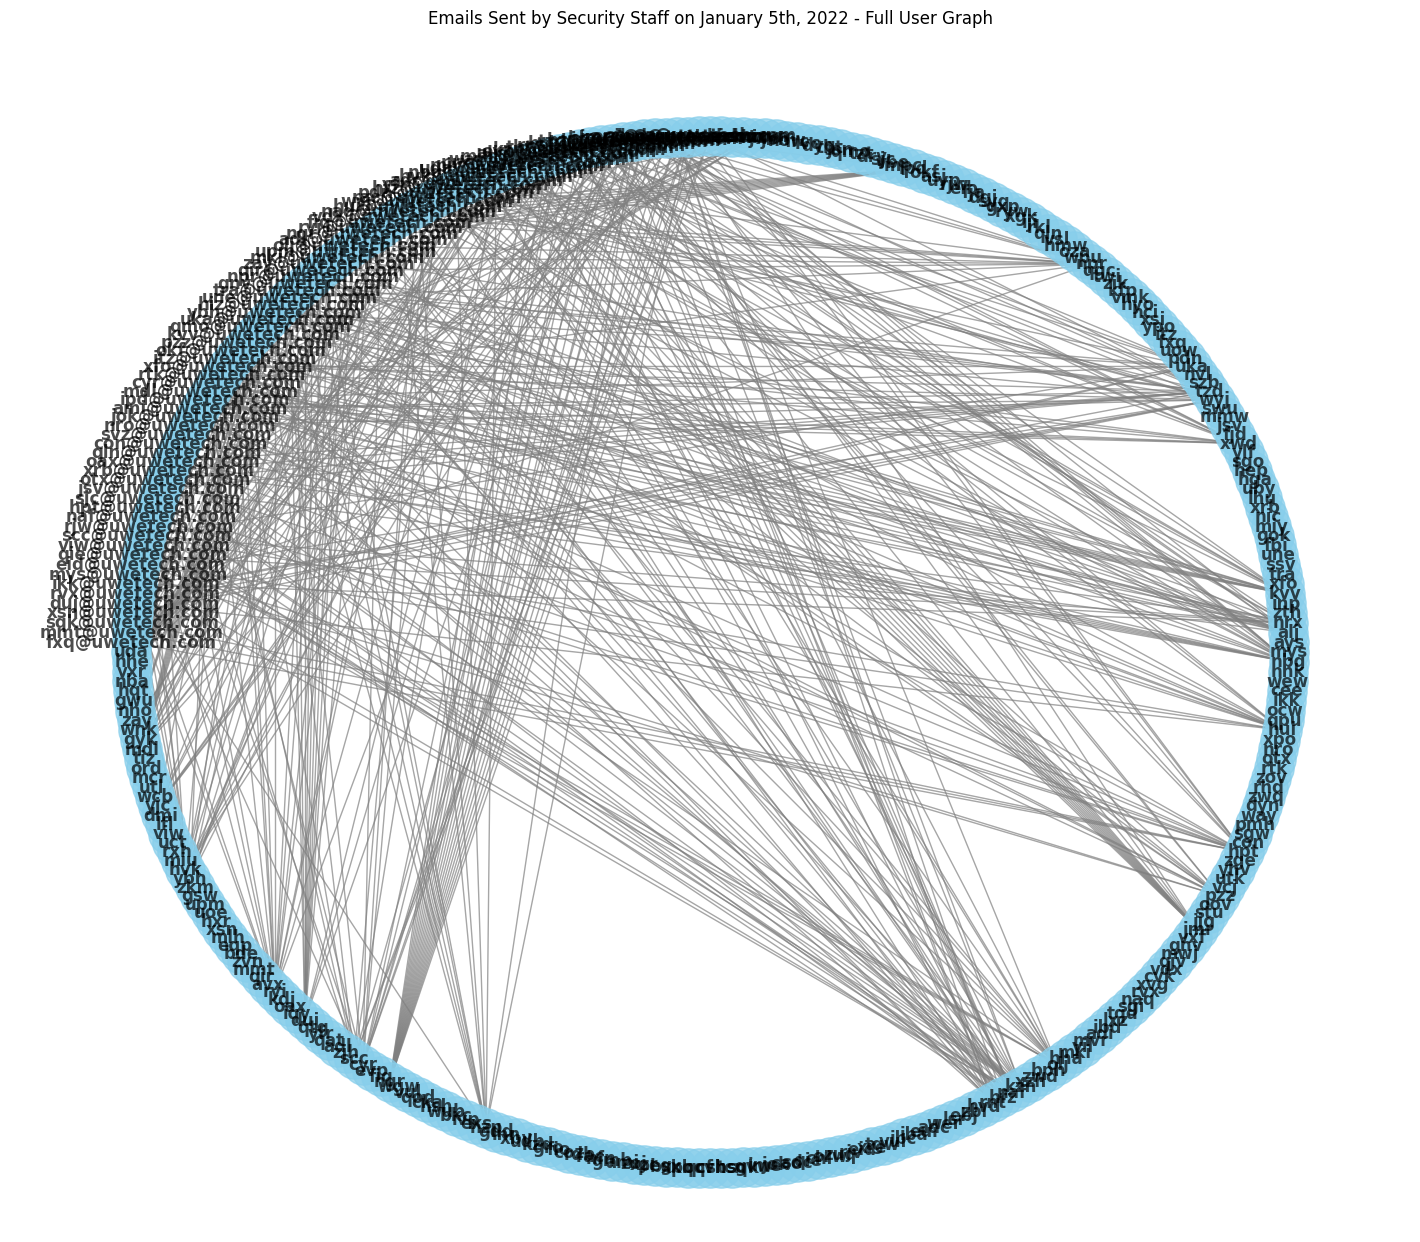

In [ ]:
def plot_full_user_graph(G):
    plt.figure(figsize=(14, 12))
    pos = nx.shell_layout(G)
    nx.draw(G, pos, with_labels=True, font_weight='bold', node_color='skyblue', node_size=800, edge_color='gray', alpha=0.7, arrowsize=20)
    plt.title('Emails Sent by Security Staff on January 5th, 2022 - Full User Graph')
    plt.show()


def create_full_user_graph(email_data, employee_data):
    # Create a graph with all users as nodes
    G = nx.Graph()
    G.add_nodes_from(employee_data['user'].apply(lambda x: x.split('-')[1]))

    # Add edges for Security staff emails on January 5th, 2022
    security_data = merge_employee_and_email_data(email_data, employee_data)
    security_emails = security_data[(security_data['role'] == 'Security') & (security_data['formatted_date'] == '2022-01-05')]

    for index, row in security_emails.iterrows():
        sender_user = row['sender_user'].split('-')[1]
        recipient_user = row['recipient'].split('-')[1]
        G.add_edge(sender_user, recipient_user)

    return G

full_user_graph = create_full_user_graph(email_data, employee_data)
plot_full_user_graph(full_user_graph)


### Question 5: Show a comparison between the files accessed by HR staff, Services staff, and Security staff, during January.

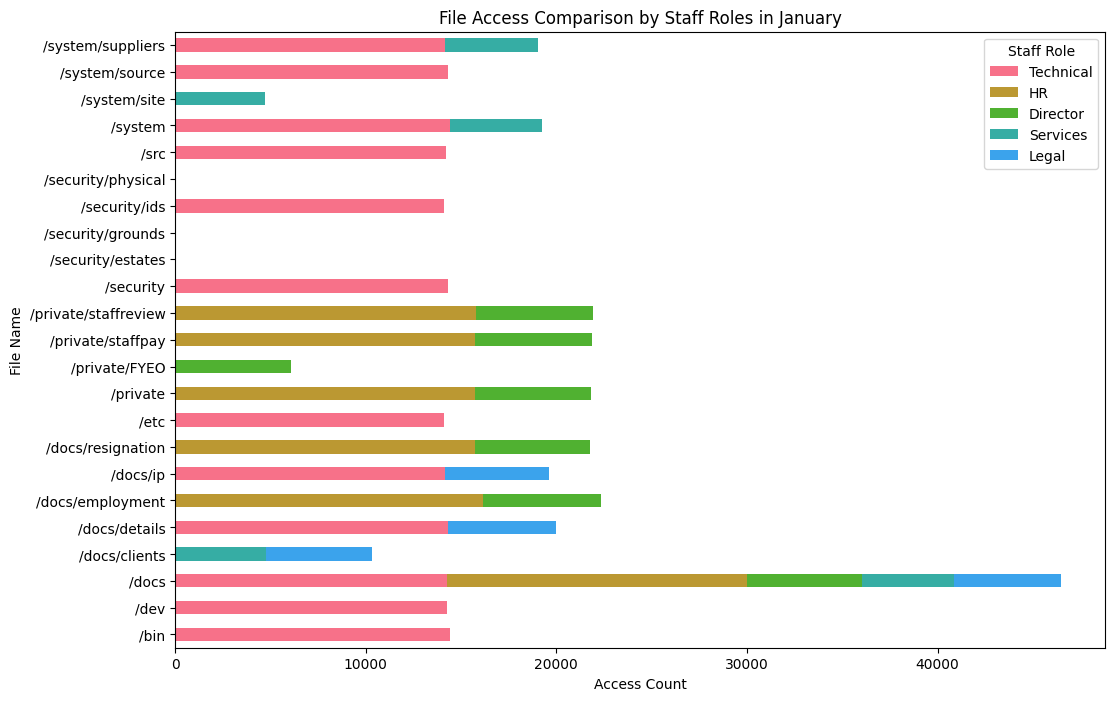

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn for better color palettes

# Convert 'datetime' column to datetime type
file_data['datetime'] = pd.to_datetime(file_data['datetime'])

# Extract month information
file_data['month'] = file_data['datetime'].dt.month

# Filter data for January
january_file_data = file_data[file_data['month'] == 1]

# Merge with employee_data to get staff roles
merged_data = pd.merge(january_file_data, employee_data[['user', 'role']], left_on='user', right_on='user', how='inner')

# Group by role and filename, count the occurrences, and unstack the result for plotting
grouped_data = merged_data.groupby(['role', 'filename']).size().unstack(fill_value=0)

# Sort roles by total access count
sorted_roles = grouped_data.sum(axis=1).sort_values(ascending=False).index
grouped_data = grouped_data.loc[sorted_roles]

# Limit the number of legend items
top_roles = 5
legend_roles = grouped_data.head(top_roles).index

# Use a horizontal bar chart for better readability
plt.figure(figsize=(12, 8))
sns.set_palette("husl")  # Use a different color palette for better contrast
grouped_data.head(top_roles).T.plot(kind='barh', stacked=True, ax=plt.gca())

# Set labels and legend
plt.title('File Access Comparison by Staff Roles in January')
plt.xlabel('Access Count')
plt.ylabel('File Name')
plt.legend(title='Staff Role', labels=legend_roles)

plt.show()


### Question 6: Carry on your own investigation to find the anomalous activity across all data files provided. Provide clear evidence and justification for your investigative steps.

## General Investigation

In [ ]:
def time(data):
    data['hours'] = data['datetime'].dt.hour


time(email_data)
time(login_data)
time(usb_data)
time(file_data)
time(web_data)

In [ ]:
#grouping the hours during a day
def split_day(df,cut_points,label_names):
    df["hours"] = df["hours"].fillna(-0.5)
    df["hour_categories"] = pd.cut(df["hours"],cut_points,labels=label_names)
    return df

cut_points = [-1,0,12,18,24]
label_names = ["midnight","morning","afternoon","evening"]


login_data = split_day(login_data,cut_points,label_names)
usb_data = split_day(usb_data,cut_points,label_names)
web_data = split_day(web_data,cut_points,label_names)
file_data = split_day(file_data,cut_points,label_names)
email_data = split_day(email_data,cut_points,label_names)

login_data


datetime     user  action     pc  month  hours  \
0      2022-01-01 00:00:30  usr-lfl   login   pc18      1      0   
1      2022-01-01 00:09:21  usr-vul   login   pc54      1      0   
2      2022-01-01 00:14:04  usr-jmr   login  pc137      1      0   
3      2022-01-01 00:15:06  usr-hvd   login  pc110      1      0   
4      2022-01-01 00:15:57  usr-ebj   login  pc108      1      0   
...                    ...      ...     ...    ...    ...    ...   
151995 2022-10-31 23:40:34  usr-bsx  logoff   pc79     10     23   
151996 2022-10-31 23:41:08  usr-gvw  logoff   pc87     10     23   
151997 2022-10-31 23:43:11  usr-hfz  logoff  pc112     10     23   
151998 2022-10-31 23:46:29  usr-dmi  logoff   pc17     10     23   
151999 2022-10-31 23:57:44  usr-ypo  logoff  pc203     10     23   

       hour_categories  
0             midnight  
1             midnight  
2             midnight  
3             midnight  
4             midnight  
...                ...  
151995         evening  
151996         evening  
151997         evening  
151998         evening  
151999         evening  

[152000 rows x 7 columns]

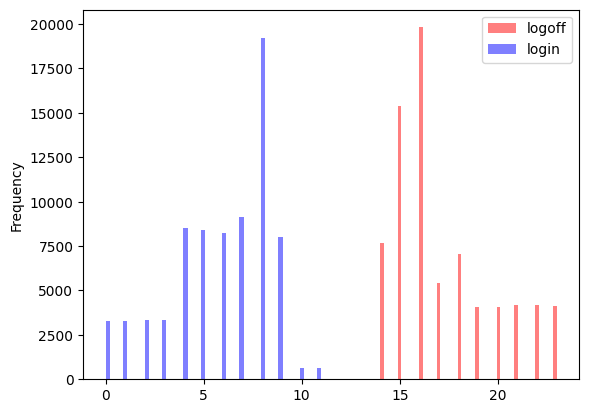

In [ ]:
logoff_time = login_data[login_data['action']=='logoff']
login_time = login_data[login_data['action']=='login']

logoff_time['hours'].plot.hist(alpha=0.5,color='red', bins=50)
login_time['hours'].plot.hist(alpha=0.5,color='blue',bins=50)
plt.legend(['logoff','login'])
plt.show()

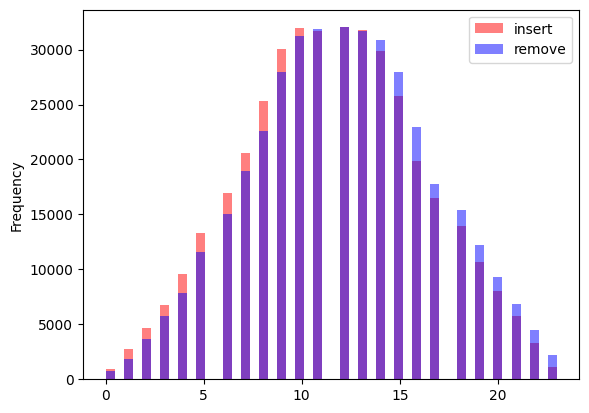

In [ ]:
insert_table = usb_data[usb_data['action']=='usb_insert']
remove_table = usb_data[usb_data['action']=='usb_remove']

#when an insert or remove appeared in the df
insert_table['hours'].plot.hist(alpha=0.5,color='red', bins=50)
remove_table['hours'].plot.hist(alpha=0.5,color='blue',bins=50)
plt.legend(['insert','remove'])
plt.show()

## USB Info

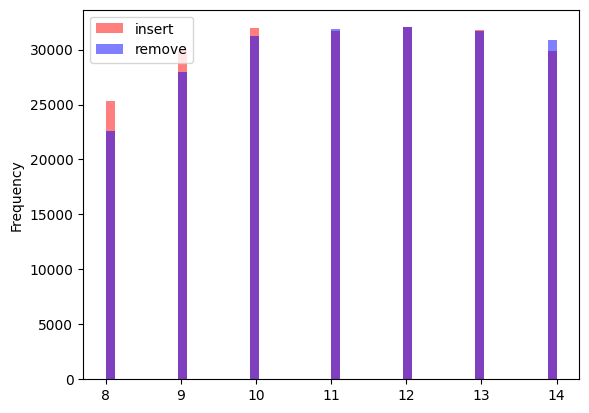

In [ ]:
#inspecting the usb data at suspecious hours. 
usbSUS = usb_data.loc[(usb_data['hours']>=8)&(usb_data['hours']<=14)]

insertSUS = usbSUS[usbSUS['action']=='usb_insert']
removeSUS = usbSUS[usbSUS['action']=='usb_remove']

insertSUS['hours'].plot.hist(alpha=0.5,color='red', bins=50)
removeSUS['hours'].plot.hist(alpha=0.5,color='blue',bins=50)
plt.legend(['insert','remove'])
plt.show()

In [ ]:
#seeing which roles used their usb during suspicious hours
user_list=usbSUS['user'].unique()

for i in range(0,len(user_list)):
    print(employee_data.loc[employee_data['user'] == user_list[i]])


        user      role                email     pc
247  usr-svz  Services  usr-svz@uwetech.com  pc247
        user      role                email     pc
177  usr-une  Services  usr-une@uwetech.com  pc177
        user      role                email     pc
150  usr-way  Services  usr-way@uwetech.com  pc150
        user       role                email     pc
238  usr-jsn  Technical  usr-jsn@uwetech.com  pc238
       user      role                email    pc
40  usr-oax  Services  usr-oax@uwetech.com  pc40
       user       role                email    pc
13  usr-mcr  Technical  usr-mcr@uwetech.com  pc13
        user       role                email     pc
204  usr-xsi  Technical  usr-xsi@uwetech.com  pc204
        user      role                email     pc
135  usr-gnv  Services  usr-gnv@uwetech.com  pc135
        user       role                email     pc
178  usr-fbi  Technical  usr-fbi@uwetech.com  pc178
        user       role                email     pc
122  usr-mvr  Technical  usr-m

Role: Services, Count: 50
Role: Technical, Count: 32
Role: Finance, Count: 29
Role: HR, Count: 44
Role: Legal, Count: 37
Role: Director, Count: 1


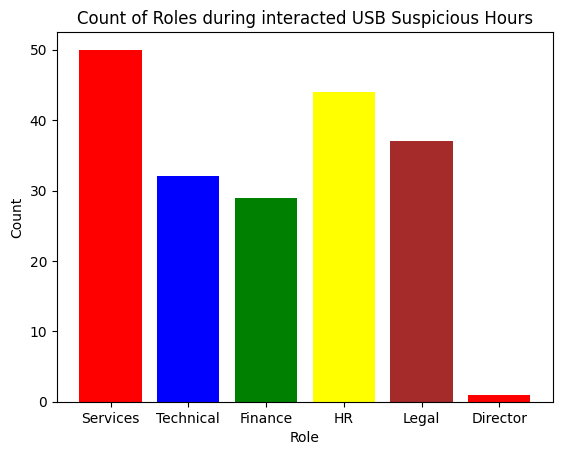

In [ ]:
# Seeing which roles used their USB during suspicious hours
user_list = usbSUS['user'].unique()

# Create a dictionary to store the count of each role
role_counts = {}

for user in user_list:
    user_data = employee_data.loc[employee_data['user'] == user]
    
    # Assuming 'role' is the column in your employee_data DataFrame
    roles = user_data['role'].unique()
    
    # Update the count for each role in the dictionary
    for role in roles:
        role_counts[role] = role_counts.get(role, 0) + 1

# Print the role counts
for role, count in role_counts.items():
    print(f"Role: {role}, Count: {count}")

# Plot histogram for the number of roles
plt.bar(role_counts.keys(), role_counts.values(), color=['red', 'blue', 'green', 'yellow', 'brown'])  
plt.xlabel('Role')
plt.ylabel('Count')
plt.title('Count of Roles interacted USB during Suspicious Hours')
plt.show()

In [ ]:
user_data

user      role                email     pc
206  usr-hyo  Director  usr-hyo@uwetech.com  pc206

## SUSPECT: usr-hyo

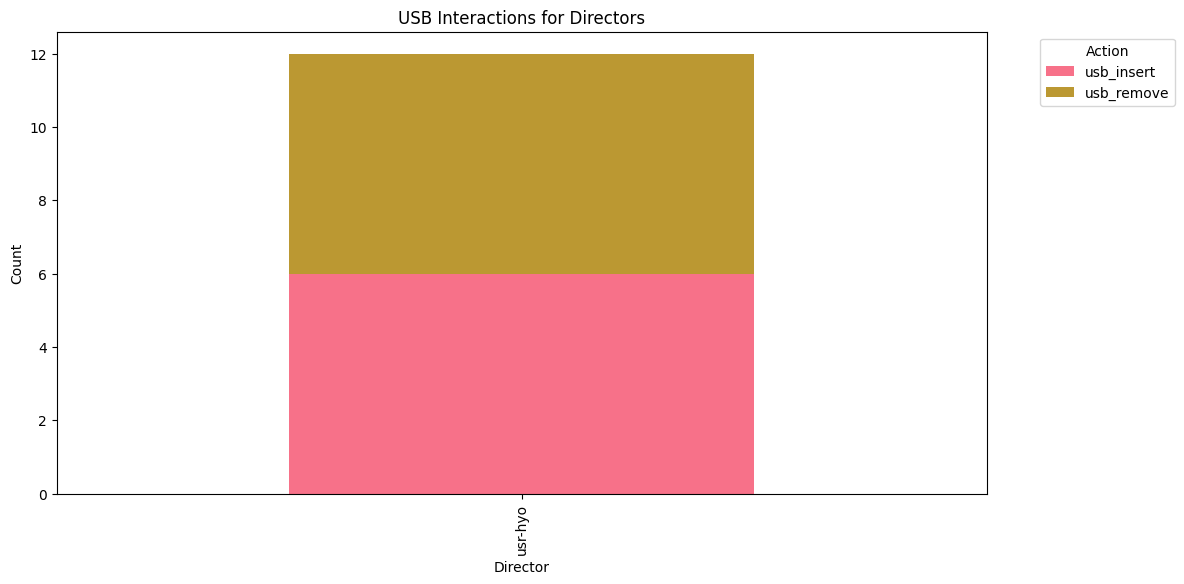

In [ ]:
import matplotlib.pyplot as plt

# Filter USB data for directors
directors = [
    'usr-dmi', 'usr-hxr', 'usr-kdj', 'usr-vul', 'usr-bkc',
    'usr-lnn', 'usr-hfn', 'usr-bsx', 'usr-sdc', 'usr-vui',
    'usr-mwj', 'usr-jjg', 'usr-vcj', 'usr-zwq', 'usr-rhd',
    'usr-zov', 'usr-nnk', 'usr-zth', 'usr-nic', 'usr-ypo',
    'usr-hyo', 'usr-twi', 'usr-vsl', 'usr-asj'
]

usb_directors = usb_data[usb_data['user'].isin(directors)]

# Group USB data by user and action
usb_interaction_counts = usb_directors.groupby(['user', 'action']).size().unstack().fillna(0)

# Plot bar chart
usb_interaction_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('USB Interactions for Directors')
plt.xlabel('Director')
plt.ylabel('Count')
plt.legend(title='Action', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Graph above indicates, 'usr-hyo' is the only director interacted with a USB.

In [ ]:
#usb activities
usb_specific = usbSUS[usbSUS['user']=='usr-hyo']
usb_specific

datetime     user      action     pc  hours  \
511452 2022-07-17 11:59:55.038394  usr-hyo  usb_insert  pc249     11   
511532 2022-07-17 12:26:27.376070  usr-hyo  usb_remove  pc249     12   
511670 2022-07-17 13:08:23.803898  usr-hyo  usb_insert  pc249     13   
511823 2022-07-17 13:50:31.902291  usr-hyo  usb_remove  pc249     13   
528937 2022-07-24 08:43:40.829376  usr-hyo  usb_insert  pc249      8   
529050 2022-07-24 09:29:05.482701  usr-hyo  usb_remove  pc249      9   

       hour_categories  
511452         morning  
511532         morning  
511670       afternoon  
511823       afternoon  
528937         morning  
529050         morning

Datetime: 2022-07-17 11:59:55.038394, Action: usb_insert, Time Difference: nan minutes
Datetime: 2022-07-17 12:26:27.376070, Action: usb_remove, Time Difference: 26.54 minutes
Datetime: 2022-07-17 13:08:23.803898, Action: usb_insert, Time Difference: 41.94 minutes
Datetime: 2022-07-17 13:50:31.902291, Action: usb_remove, Time Difference: 42.13 minutes
Datetime: 2022-07-24 08:43:40.829376, Action: usb_insert, Time Difference: 9773.15 minutes
Datetime: 2022-07-24 09:29:05.482701, Action: usb_remove, Time Difference: 45.41 minutes


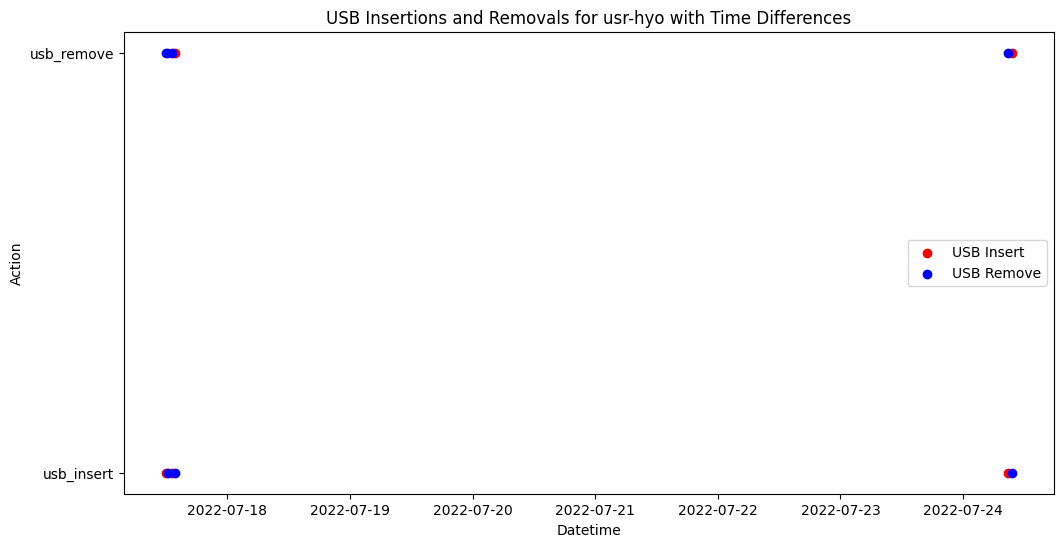

In [ ]:
# Convert 'datetime' column to datetime type
usb_specific['datetime'] = pd.to_datetime(usb_specific['datetime'])

# Sort the DataFrame by datetime
usb_specific = usb_specific.sort_values(by='datetime')

# Calculate time differences in minutes
usb_specific['time_diff_minutes'] = usb_specific['datetime'].diff().dt.total_seconds() / 60.0

# Plotting USB insertions and removals with time differences
plt.figure(figsize=(12, 6))
plt.scatter(usb_specific['datetime'], usb_specific['action'], color='red', label='USB Insert')
plt.scatter(usb_specific['datetime'], usb_specific['action'].apply(lambda x: 'usb_remove' if x == 'usb_insert' else 'usb_insert'), color='blue', label='USB Remove')
plt.title('USB Insertions and Removals for usr-hyo with Time Differences')
plt.xlabel('Datetime')
plt.ylabel('Action')
plt.legend()

#Printing out the time spent on usb
for i, row in usb_specific.iterrows():
    print(f"Datetime: {row['datetime']}, Action: {row['action']}, Time Difference: {row['time_diff_minutes']:.2f} minutes")

plt.show()


# Login Info

In [ ]:
login_data

datetime     user  action     pc  month  hours  \
0      2022-01-01 00:00:30  usr-lfl   login   pc18      1      0   
1      2022-01-01 00:09:21  usr-vul   login   pc54      1      0   
2      2022-01-01 00:14:04  usr-jmr   login  pc137      1      0   
3      2022-01-01 00:15:06  usr-hvd   login  pc110      1      0   
4      2022-01-01 00:15:57  usr-ebj   login  pc108      1      0   
...                    ...      ...     ...    ...    ...    ...   
151995 2022-10-31 23:40:34  usr-bsx  logoff   pc79     10     23   
151996 2022-10-31 23:41:08  usr-gvw  logoff   pc87     10     23   
151997 2022-10-31 23:43:11  usr-hfz  logoff  pc112     10     23   
151998 2022-10-31 23:46:29  usr-dmi  logoff   pc17     10     23   
151999 2022-10-31 23:57:44  usr-ypo  logoff  pc203     10     23   

       hour_categories  
0             midnight  
1             midnight  
2             midnight  
3             midnight  
4             midnight  
...                ...  
151995         evening  
151996         evening  
151997         evening  
151998         evening  
151999         evening  

[152000 rows x 7 columns]

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_5464\2839133211.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  login_data_hyo['datetime'] = pd.to_datetime(login_data_hyo['datetime'])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_5464\2839133211.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  logoff_data_hyo['datetime'] = pd.to_datetime(logoff_data_hyo['datetime'])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_5464\2839133211.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

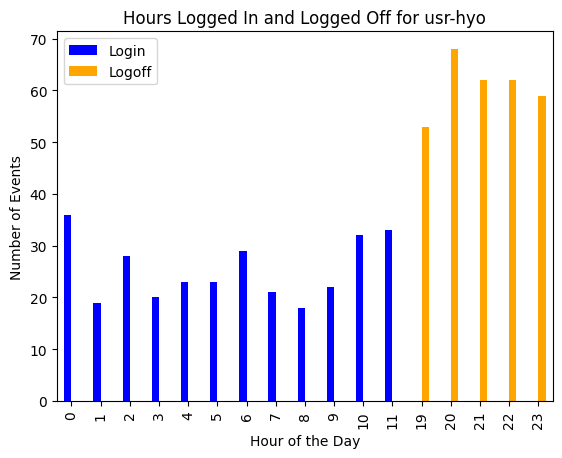

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

login_data_hyo = login_data[(login_data['user'] == 'usr-hyo') & (login_data['action'] == 'login')]
logoff_data_hyo = login_data[(login_data['user'] == 'usr-hyo') & (login_data['action'] == 'logoff')]

# Extract hour information from the datetime column
login_data_hyo['datetime'] = pd.to_datetime(login_data_hyo['datetime'])
logoff_data_hyo['datetime'] = pd.to_datetime(logoff_data_hyo['datetime'])

login_data_hyo['hour'] = login_data_hyo['datetime'].dt.hour
logoff_data_hyo['hour'] = logoff_data_hyo['datetime'].dt.hour

# Count the occurrences of each hour for login and logoff separately
login_hour_counts = login_data_hyo['hour'].value_counts().sort_index()
logoff_hour_counts = logoff_data_hyo['hour'].value_counts().sort_index()

# Combine login and logoff hour counts into a single DataFrame
hour_counts = pd.DataFrame({'Login': login_hour_counts, 'Logoff': logoff_hour_counts}).fillna(0)

# Plot the results
hour_counts.plot(kind='bar', color=['blue', 'orange'])

# Customize plot
plt.title('Hours Logged In and Logged Off for usr-hyo')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Events')
plt.legend()
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13948\1207807005.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  login_data_hyo['datetime'] = pd.to_datetime(login_data_hyo['datetime'])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13948\1207807005.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  logoff_data_hyo['datetime'] = pd.to_datetime(logoff_data_hyo['datetime'])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13948\1207807005.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

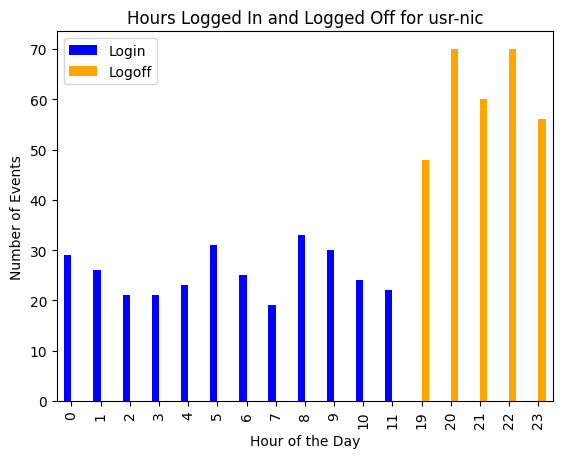

In [22]:
# Another director to compare login_data

login_data_hyo = login_data[(login_data['user'] == 'usr-nic') & (login_data['action'] == 'login')]
logoff_data_hyo = login_data[(login_data['user'] == 'usr-nic') & (login_data['action'] == 'logoff')]

# Extract hour information from the datetime column
login_data_hyo['datetime'] = pd.to_datetime(login_data_hyo['datetime'])
logoff_data_hyo['datetime'] = pd.to_datetime(logoff_data_hyo['datetime'])

login_data_hyo['hour'] = login_data_hyo['datetime'].dt.hour
logoff_data_hyo['hour'] = logoff_data_hyo['datetime'].dt.hour

# Count the occurrences of each hour for login and logoff separately
login_hour_counts = login_data_hyo['hour'].value_counts().sort_index()
logoff_hour_counts = logoff_data_hyo['hour'].value_counts().sort_index()

# Combine login and logoff hour counts into a single DataFrame
hour_counts = pd.DataFrame({'Login': login_hour_counts, 'Logoff': logoff_hour_counts}).fillna(0)

# Plot the results
hour_counts.plot(kind='bar', color=['blue', 'orange'])

# Customize plot
plt.title('Hours Logged In and Logged Off for usr-nic')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Events')
plt.legend()
plt.show()


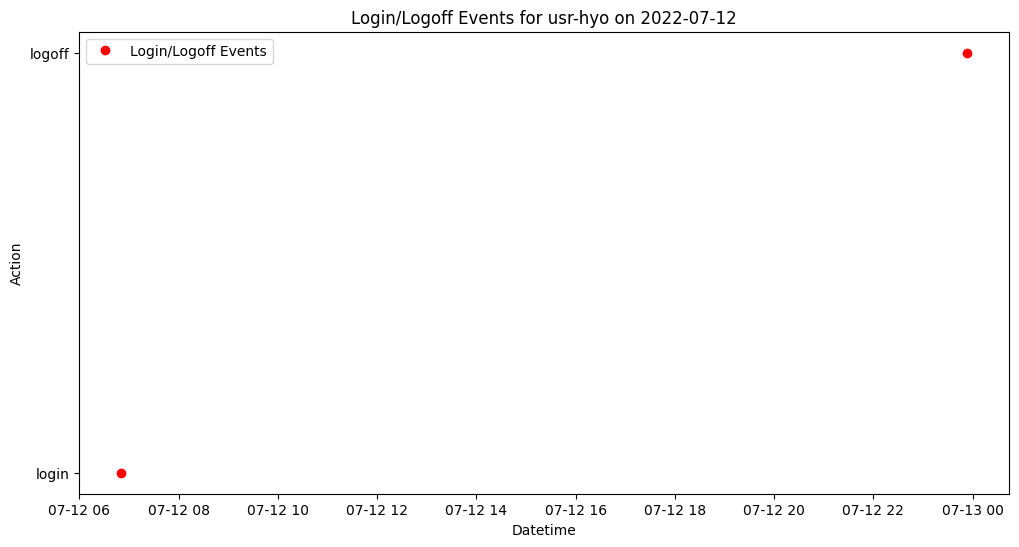

In [11]:
login_data['datetime'] = pd.to_datetime(login_data['datetime'])
login_data_filtered = login_data[(login_data['datetime'].dt.date == pd.to_datetime('2022-07-12').date()) & (login_data['user'] == 'usr-hyo')]

# Plot login and logoff events
plt.figure(figsize=(12, 6))
plt.plot(login_data_filtered['datetime'], login_data_filtered['action'], marker='o', linestyle='', color='red', label='Login/Logoff Events')
plt.title('Login/Logoff Events for usr-hyo on 2022-07-12')
plt.xlabel('Datetime')
plt.ylabel('Action')
plt.legend()
plt.show()


# E-Mail Info

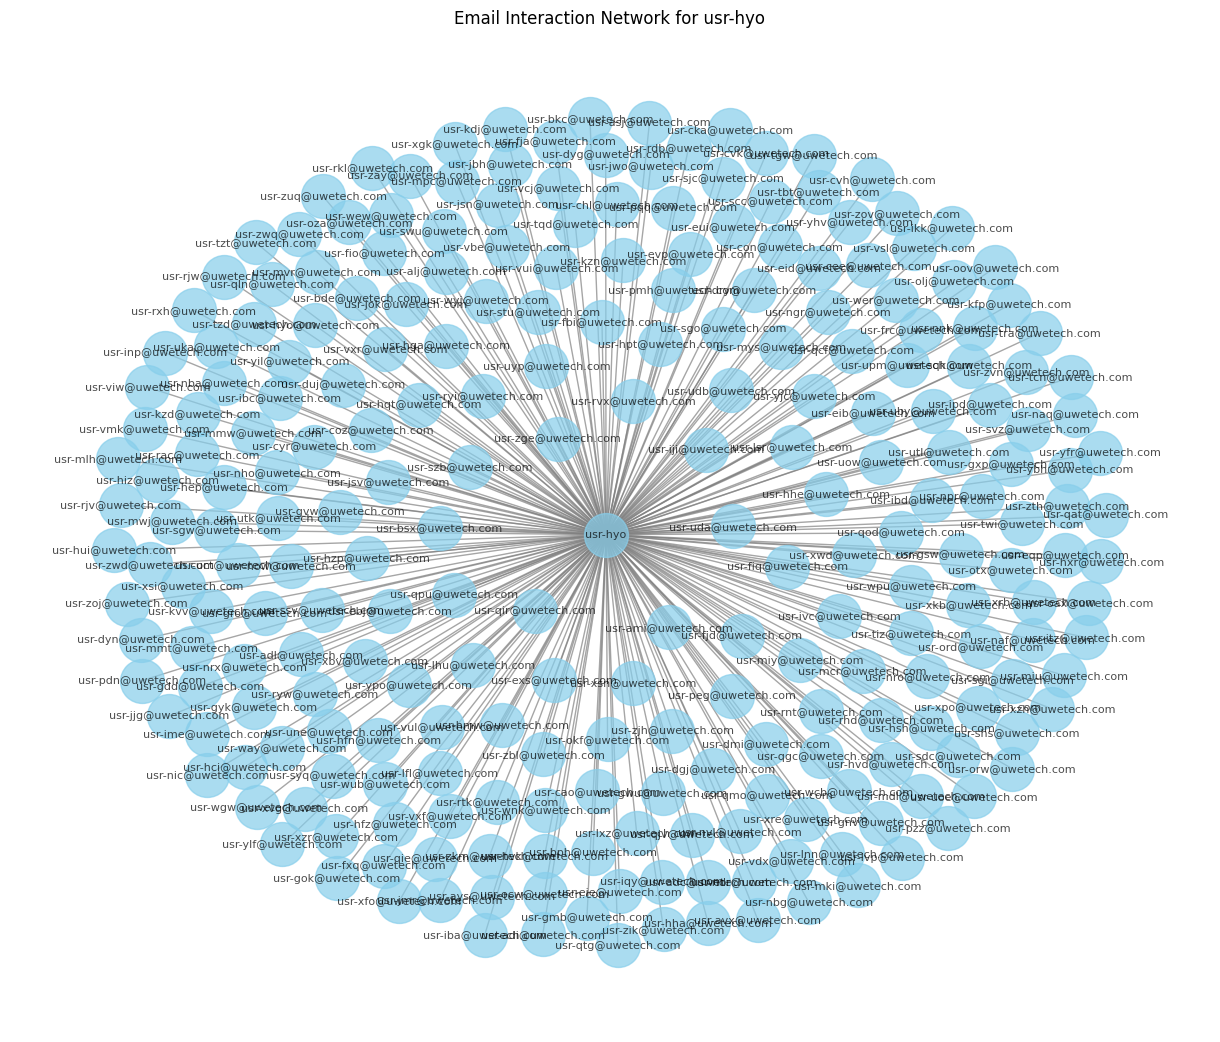

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

def preprocess_email_data(email_data):
    email_data['datetime'] = pd.to_datetime(email_data['datetime'])
    email_data['formatted_date'] = email_data['datetime'].dt.strftime('%Y-%m-%d')
    email_data['sender_user'] = email_data['sender'].str.split('@').str[0]
    email_data['recipient_user'] = email_data['recipient'].str.split('@').str[0]
    return email_data

def filter_email_data(email_data, user):
    return email_data[(email_data['sender_user'] == user) | (email_data['recipient'] == user)]

def create_email_graph(filtered_data):
    G = nx.Graph()
    for index, row in filtered_data.iterrows():
        sender_user = row['sender_user']
        recipient_user = row['recipient']
        G.add_edge(sender_user, recipient_user)

    return G

def plot_email_graph(G):
    plt.figure(figsize=(12, 10))
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, font_size=8, font_color='black', node_size=1000, node_color='skyblue', edge_color='gray', alpha=0.7)
    plt.title('Email Interaction Network for usr-hyo')
    plt.show()

# Example usage:
user = 'usr-hyo'
email_data = preprocess_email_data(email_data)
filtered_data = filter_email_data(email_data, user)
G = create_email_graph(filtered_data)
plot_email_graph(G)



In [ ]:
email_sus = email_data[(email_data['sender']=='usr-hyo@uwetech.com')]
email_sus

datetime               sender            recipient  \
1099    2022-01-01 06:36:03.577336  usr-hyo@uwetech.com  usr-twi@uwetech.com   
1180    2022-01-01 06:47:27.515415  usr-hyo@uwetech.com  usr-hep@uwetech.com   
1228    2022-01-01 06:55:31.259713  usr-hyo@uwetech.com  usr-bkc@uwetech.com   
1563    2022-01-01 07:38:36.619160  usr-hyo@uwetech.com  usr-cao@uwetech.com   
2005    2022-01-01 08:24:08.983638  usr-hyo@uwetech.com  usr-iba@uwetech.com   
...                            ...                  ...                  ...   
3716933 2022-10-31 18:57:35.033281  usr-hyo@uwetech.com  usr-adi@uwetech.com   
3717047 2022-10-31 19:17:53.821829  usr-hyo@uwetech.com  usr-ami@uwetech.com   
3717458 2022-10-31 20:38:35.279431  usr-hyo@uwetech.com  usr-zov@uwetech.com   
3717524 2022-10-31 21:00:56.010209  usr-hyo@uwetech.com  usr-nnk@uwetech.com   
3717593 2022-10-31 21:29:37.299728  usr-hyo@uwetech.com  usr-fja@uwetech.com   

        formatted_date sender_user  hours hour_categories recipient_user  
1099        2022-01-01     usr-hyo      6         morning        usr-twi  
1180        2022-01-01     usr-hyo      6         morning        usr-hep  
1228        2022-01-01     usr-hyo      6         morning        usr-bkc  
1563        2022-01-01     usr-hyo      7         morning        usr-cao  
2005        2022-01-01     usr-hyo      8         morning        usr-iba  
...                ...         ...    ...             ...            ...  
3716933     2022-10-31     usr-hyo     18       afternoon        usr-adi  
3717047     2022-10-31     usr-hyo     19         evening        usr-ami  
3717458     2022-10-31     usr-hyo     20         evening        usr-zov  
3717524     2022-10-31     usr-hyo     21         evening        usr-nnk  
3717593     2022-10-31     usr-hyo     21         evening        usr-fja  

[17442 rows x 8 columns]

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_5464\222597597.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  email_sus.loc[:, 'datetime'] = pd.to_datetime(email_sus['datetime'])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_5464\222597597.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  email_sus.loc[:, 'hour'] = email_sus['hours']


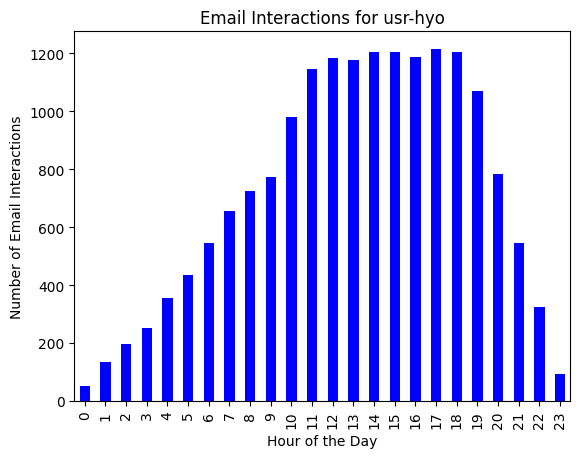

In [ ]:
email_sus.loc[:, 'datetime'] = pd.to_datetime(email_sus['datetime'])
email_sus.loc[:, 'hour'] = email_sus['hours']

# Count the occurrences of each hour for email interactions
email_hour_counts = email_sus['hours'].value_counts().sort_index()

# Plot the results
email_hour_counts.plot(kind='bar', color='blue')

# Customize plot
plt.title('Email Interactions for usr-hyo')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Email Interactions')
plt.show()

In [ ]:
email_sus

datetime               sender            recipient  \
1099    2022-01-01 06:36:03.577336  usr-hyo@uwetech.com  usr-twi@uwetech.com   
1180    2022-01-01 06:47:27.515415  usr-hyo@uwetech.com  usr-hep@uwetech.com   
1228    2022-01-01 06:55:31.259713  usr-hyo@uwetech.com  usr-bkc@uwetech.com   
1563    2022-01-01 07:38:36.619160  usr-hyo@uwetech.com  usr-cao@uwetech.com   
2005    2022-01-01 08:24:08.983638  usr-hyo@uwetech.com  usr-iba@uwetech.com   
...                            ...                  ...                  ...   
3716933 2022-10-31 18:57:35.033281  usr-hyo@uwetech.com  usr-adi@uwetech.com   
3717047 2022-10-31 19:17:53.821829  usr-hyo@uwetech.com  usr-ami@uwetech.com   
3717458 2022-10-31 20:38:35.279431  usr-hyo@uwetech.com  usr-zov@uwetech.com   
3717524 2022-10-31 21:00:56.010209  usr-hyo@uwetech.com  usr-nnk@uwetech.com   
3717593 2022-10-31 21:29:37.299728  usr-hyo@uwetech.com  usr-fja@uwetech.com   

        formatted_date sender_user  hours hour_categories  hour  
1099        2022-01-01     usr-hyo      6         morning     6  
1180        2022-01-01     usr-hyo      6         morning     6  
1228        2022-01-01     usr-hyo      6         morning     6  
1563        2022-01-01     usr-hyo      7         morning     7  
2005        2022-01-01     usr-hyo      8         morning     8  
...                ...         ...    ...             ...   ...  
3716933     2022-10-31     usr-hyo     18       afternoon    18  
3717047     2022-10-31     usr-hyo     19         evening    19  
3717458     2022-10-31     usr-hyo     20         evening    20  
3717524     2022-10-31     usr-hyo     21         evening    21  
3717593     2022-10-31     usr-hyo     21         evening    21  

[17442 rows x 8 columns]

In [ ]:
email_sus_hours = email_sus[(email_sus['hours'] < 4) | (email_sus['hours'] > 22)]
email_sus_hours 

datetime               sender            recipient  \
11852   2022-01-01 23:03:57.867818  usr-hyo@uwetech.com  usr-cka@uwetech.com   
11862   2022-01-01 23:14:48.524875  usr-hyo@uwetech.com  usr-zge@uwetech.com   
11870   2022-01-01 23:29:02.061539  usr-hyo@uwetech.com  usr-zwd@uwetech.com   
49076   2022-01-05 00:59:54.117440  usr-hyo@uwetech.com  usr-nho@uwetech.com   
49091   2022-01-05 01:19:17.929501  usr-hyo@uwetech.com  usr-utl@uwetech.com   
...                            ...                  ...                  ...   
3585306 2022-10-21 03:51:15.876392  usr-hyo@uwetech.com  usr-xzh@uwetech.com   
3585331 2022-10-21 03:59:50.520825  usr-hyo@uwetech.com  usr-fbi@uwetech.com   
3621502 2022-10-23 23:03:04.103777  usr-hyo@uwetech.com  usr-bsx@uwetech.com   
3621532 2022-10-23 23:18:10.460114  usr-hyo@uwetech.com  usr-wub@uwetech.com   
3694182 2022-10-30 03:59:10.299979  usr-hyo@uwetech.com  usr-dmi@uwetech.com   

        formatted_date sender_user  hours hour_categories recipient_user  
11852       2022-01-01     usr-hyo     23         evening        usr-cka  
11862       2022-01-01     usr-hyo     23         evening        usr-zge  
11870       2022-01-01     usr-hyo     23         evening        usr-zwd  
49076       2022-01-05     usr-hyo      0        midnight        usr-nho  
49091       2022-01-05     usr-hyo      1         morning        usr-utl  
...                ...         ...    ...             ...            ...  
3585306     2022-10-21     usr-hyo      3         morning        usr-xzh  
3585331     2022-10-21     usr-hyo      3         morning        usr-fbi  
3621502     2022-10-23     usr-hyo     23         evening        usr-bsx  
3621532     2022-10-23     usr-hyo     23         evening        usr-wub  
3694182     2022-10-30     usr-hyo      3         morning        usr-dmi  

[727 rows x 8 columns]

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_5464\1876151280.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  email_sus_hours.loc[:, 'datetime'] = pd.to_datetime(email_sus_hours['datetime'])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_5464\1876151280.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  email_sus_hours.loc[:, 'hour'] = email_sus_hours['hours']


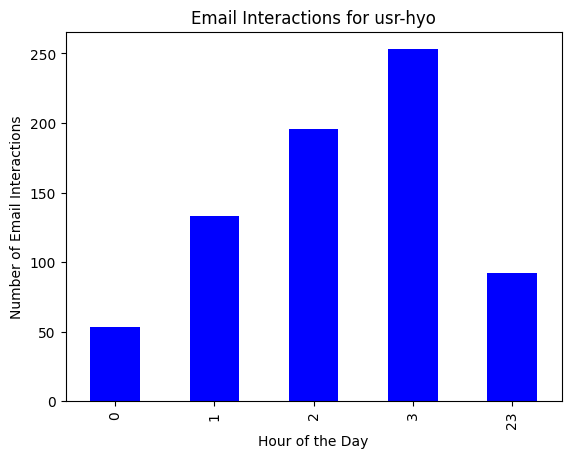

In [ ]:
email_sus_hours.loc[:, 'datetime'] = pd.to_datetime(email_sus_hours['datetime'])
email_sus_hours.loc[:, 'hour'] = email_sus_hours['hours']

# Count the occurrences of each hour for email interactions
email_hours_counts = email_sus_hours['hours'].value_counts().sort_index()

# Plot the results
email_hours_counts.plot(kind='bar', color='blue')

# Customize plot
plt.title('Email Interactions for usr-hyo')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Email Interactions')
plt.show()

In [ ]:
email_sus_hours['recipient'].value_counts()

usr-gxp@uwetech.com    25
usr-orw@uwetech.com    10
usr-zoj@uwetech.com     9
usr-hsh@uwetech.com     9
usr-zov@uwetech.com     8
                       ..
usr-eie@uwetech.com     1
usr-yfr@uwetech.com     1
usr-rac@uwetech.com     1
usr-ryw@uwetech.com     1
usr-fiq@uwetech.com     1
Name: recipient, Length: 227, dtype: int64

In [ ]:
email_data_filtered = email_data[(email_data['datetime'].dt.date == pd.to_datetime('2022-07-12').date()) & ((email_data['sender'] == 'usr-hyo@uwetech.com') | (email_data['recipient'] == 'usr-hyo@uwetech.com'))]


# File Info

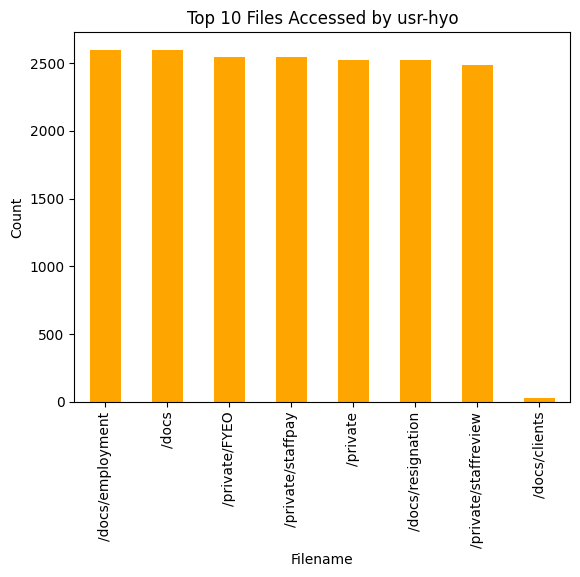

In [ ]:
# Extract file access for usr-hyo
user_file_access = file_data[file_data['user'] == 'usr-hyo']

# Plot count of files accessed
user_file_access['filename'].value_counts().head(10).plot(kind='bar', color='orange')
plt.title('Top 10 Files Accessed by usr-hyo')
plt.xlabel('Filename')
plt.ylabel('Count')
plt.show()


In [ ]:
director_df = employee_data[employee_data['role']=='Director']
director_df

user      role                email     pc
17   usr-dmi  Director  usr-dmi@uwetech.com   pc17
29   usr-hxr  Director  usr-hxr@uwetech.com   pc29
39   usr-kdj  Director  usr-kdj@uwetech.com   pc39
54   usr-vul  Director  usr-vul@uwetech.com   pc54
59   usr-bkc  Director  usr-bkc@uwetech.com   pc59
64   usr-lnn  Director  usr-lnn@uwetech.com   pc64
73   usr-hfn  Director  usr-hfn@uwetech.com   pc73
79   usr-bsx  Director  usr-bsx@uwetech.com   pc79
91   usr-sdc  Director  usr-sdc@uwetech.com   pc91
100  usr-vui  Director  usr-vui@uwetech.com  pc100
134  usr-mwj  Director  usr-mwj@uwetech.com  pc134
138  usr-jjg  Director  usr-jjg@uwetech.com  pc138
142  usr-vcj  Director  usr-vcj@uwetech.com  pc142
152  usr-zwq  Director  usr-zwq@uwetech.com  pc152
153  usr-rhd  Director  usr-rhd@uwetech.com  pc153
154  usr-zov  Director  usr-zov@uwetech.com  pc154
165  usr-nnk  Director  usr-nnk@uwetech.com  pc165
171  usr-zth  Director  usr-zth@uwetech.com  pc171
181  usr-nic  Director  usr-nic@uwetech.com  pc181
203  usr-ypo  Director  usr-ypo@uwetech.com  pc203
206  usr-hyo  Director  usr-hyo@uwetech.com  pc206
210  usr-twi  Director  usr-twi@uwetech.com  pc210
216  usr-vsl  Director  usr-vsl@uwetech.com  pc216
229  usr-asj  Director  usr-asj@uwetech.com  pc229

In [ ]:
merged_data = pd.merge(file_data, director_df, on='user')
file_counts_by_director = merged_data['filename'].value_counts()
print(file_counts_by_director)



/docs/employment        59862
/private/FYEO           59793
/private/staffreview    59632
/private                59612
/docs/resignation       59611
/private/staffpay       59527
/docs                   59489
/docs/clients              30
Name: filename, dtype: int64


In [ ]:
# Assuming 'usr-hyo' is the user you want to find interactions for
specific_user = 'usr-hyo'

# Use xs to get the interactions for the specific user
user_interactions = file_counts_by_director.xs(specific_user, level='user', drop_level=False)

# Print or visualize the interactions for the specific user
print(user_interactions)


user     filename            
usr-hyo  /docs                   2596
         /docs/clients             30
         /docs/employment        2597
         /docs/resignation       2520
         /private                2521
         /private/FYEO           2545
         /private/staffpay       2545
         /private/staffreview    2484
dtype: int64


In [ ]:
sus_file = user_file_access[user_file_access['filename']=='/docs/clients']

datetime     user       filename  month  hours  \
2348133 2022-07-12 06:58:25.123232  usr-hyo  /docs/clients      7      6   
2348139 2022-07-12 06:59:06.745526  usr-hyo  /docs/clients      7      6   
2348537 2022-07-12 07:37:09.769556  usr-hyo  /docs/clients      7      7   
2348647 2022-07-12 07:48:12.848478  usr-hyo  /docs/clients      7      7   
2348688 2022-07-12 07:51:48.764408  usr-hyo  /docs/clients      7      7   
2349934 2022-07-12 09:21:56.767602  usr-hyo  /docs/clients      7      9   
2350098 2022-07-12 09:30:38.664161  usr-hyo  /docs/clients      7      9   
2350902 2022-07-12 10:13:50.335606  usr-hyo  /docs/clients      7     10   
2352079 2022-07-12 11:17:02.724040  usr-hyo  /docs/clients      7     11   
2352408 2022-07-12 11:34:23.451287  usr-hyo  /docs/clients      7     11   
2352599 2022-07-12 11:43:56.096011  usr-hyo  /docs/clients      7     11   
2353418 2022-07-12 12:26:19.196229  usr-hyo  /docs/clients      7     12   
2354206 2022-07-12 13:05:56.117892  usr-hyo  /docs/clients      7     13   
2355805 2022-07-12 14:26:54.486684  usr-hyo  /docs/clients      7     14   
2357242 2022-07-12 16:14:39.916622  usr-hyo  /docs/clients      7     16   
2357839 2022-07-12 17:28:35.636082  usr-hyo  /docs/clients      7     17   
2358153 2022-07-12 18:09:16.372082  usr-hyo  /docs/clients      7     18   
2358770 2022-07-12 19:43:12.594940  usr-hyo  /docs/clients      7     19   
2358830 2022-07-12 19:55:35.816490  usr-hyo  /docs/clients      7     19   
2358833 2022-07-12 19:56:07.871036  usr-hyo  /docs/clients      7     19   
2358912 2022-07-12 20:08:34.786994  usr-hyo  /docs/clients      7     20   
2359126 2022-07-12 20:51:06.098135  usr-hyo  /docs/clients      7     20   
2359290 2022-07-12 21:35:21.768632  usr-hyo  /docs/clients      7     21   
2359296 2022-07-12 21:37:47.451838  usr-hyo  /docs/clients      7     21   
2359302 2022-07-12 21:38:51.421717  usr-hyo  /docs/clients      7     21   
2359364 2022-07-12 21:59:40.736330  usr-hyo  /docs/clients      7     21   
2359414 2022-07-12 22:22:22.882286  usr-hyo  /docs/clients      7     22   
2359419 2022-07-12 22:25:04.296056  usr-hyo  /docs/clients      7     22   
2359431 2022-07-12 22:32:09.509505  usr-hyo  /docs/clients      7     22   
2359518 2022-07-12 23:36:29.752910  usr-hyo  /docs/clients      7     23   

        hour_categories  
2348133         morning  
2348139         morning  
2348537         morning  
2348647         morning  
2348688         morning  
2349934         morning  
2350098         morning  
2350902         morning  
2352079         morning  
2352408         morning  
2352599         morning  
2353418         morning  
2354206       afternoon  
2355805       afternoon  
2357242       afternoon  
2357839       afternoon  
2358153       afternoon  
2358770         evening  
2358830         evening  
2358833         evening  
2358912         evening  
2359126         evening  
2359290         evening  
2359296         evening  
2359302         evening  
2359364         evening  
2359414         evening  
2359419         evening  
2359431         evening  
2359518         evening

In [ ]:
file_data['datetime'] = pd.to_datetime(file_data['datetime'])

# Filter data for the specific day (2022-07-12) and the suspect usr-hyo
file_data_filtered = file_data[(file_data['datetime'].dt.date == pd.to_datetime('2022-07-12').date()) & (file_data['user'] == 'usr-hyo')]

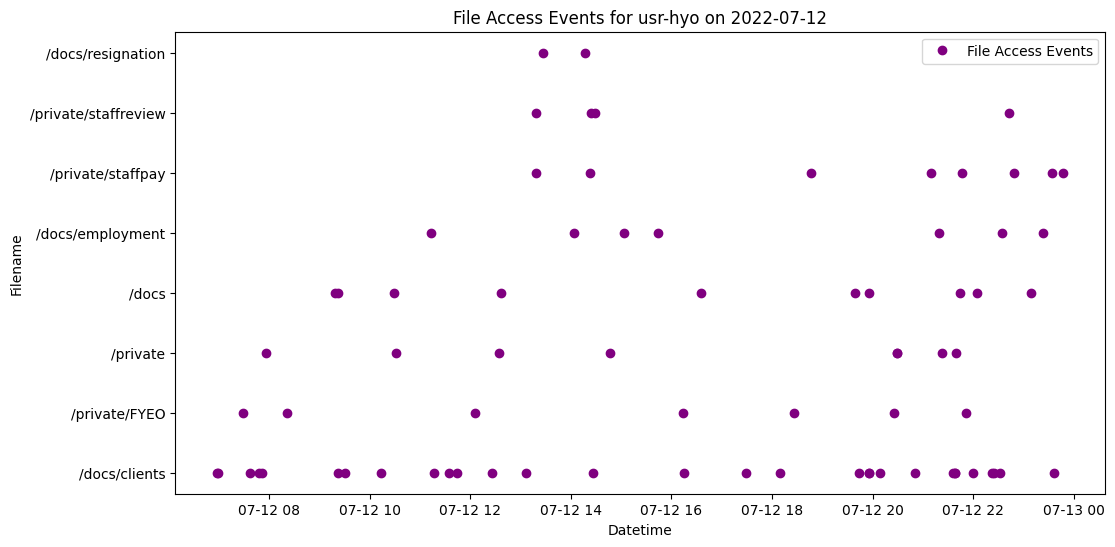

In [ ]:
# Plot file access events
plt.figure(figsize=(12, 6))
plt.plot(file_data_filtered['datetime'], file_data_filtered['filename'], marker='o', linestyle='', color='purple', label='File Access Events')
plt.title('File Access Events for usr-hyo on 2022-07-12')
plt.xlabel('Datetime')
plt.ylabel('Filename')
plt.legend()
plt.show()


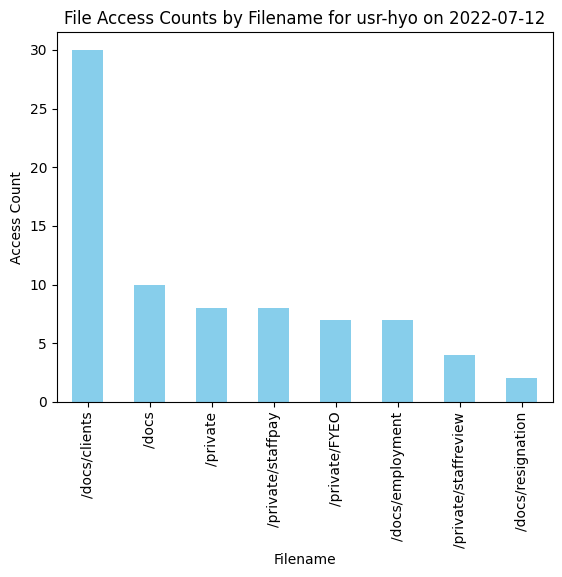

In [13]:
file_data_filtered = file_data[(file_data['datetime'].dt.date == pd.to_datetime('2022-07-12').date()) & (file_data['user'] == 'usr-hyo')]
# Plotting file access counts by filename
file_counts = file_data_filtered['filename'].value_counts()
file_counts.plot(kind='bar', color='skyblue')
plt.title('File Access Counts by Filename for usr-hyo on 2022-07-12')
plt.xlabel('Filename')
plt.ylabel('Access Count')
plt.show()

# Web Info

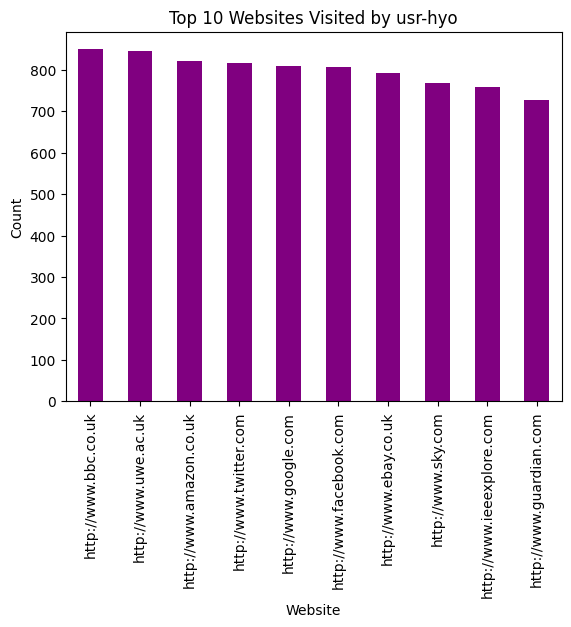

In [ ]:
# Extract web activities for usr-hyo
user_web_activities = web_data[web_data['user'] == 'usr-hyo']

# Plot count of websites visited
user_web_activities['website'].value_counts().head(10).plot(kind='bar', color='purple')
plt.title('Top 10 Websites Visited by usr-hyo')
plt.xlabel('Website')
plt.ylabel('Count')
plt.show()


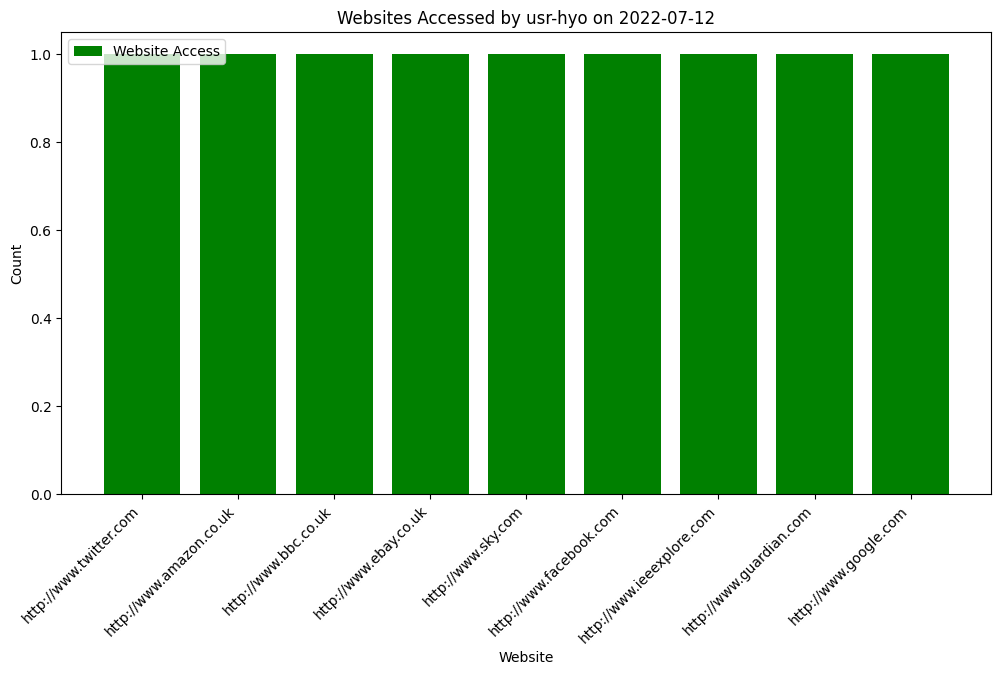

In [9]:
web_data['datetime'] = pd.to_datetime(web_data['datetime'])
web_data_filtered = web_data[(web_data['datetime'].dt.date == pd.to_datetime('2022-07-12').date()) & (web_data['user'] == 'usr-hyo')]


# Plot websites accessed
plt.figure(figsize=(12, 6))
plt.bar(web_data_filtered['website'], height=1, color='green', label='Website Access')
plt.title('Websites Accessed by usr-hyo on 2022-07-12')
plt.xlabel('Website')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()


In [ ]:
leaderboard = {}
for x in G.nodes:
    leaderboard[x] = len(G[x])

s = pd.Series(leaderboard, name='connections')
network_data = s.to_frame().sort_values('connections', ascending=False)
network_data

connections
usr-hyo                      249
usr-utk@uwetech.com            1
usr-mlh@uwetech.com            1
usr-wew@uwetech.com            1
usr-yfr@uwetech.com            1
...                          ...
usr-hsh@uwetech.com            1
usr-coz@uwetech.com            1
usr-hui@uwetech.com            1
usr-dmi@uwetech.com            1
usr-hvk@uwetech.com            1

[250 rows x 1 columns]

In [7]:
#checking if there is an email that is not ends with the company tag
diff = email_data.loc[email_data['recipient'].str.endswith('@onlinebargains.com')]
diff

Empty DataFrame
Columns: [datetime, sender, recipient]
Index: []

In [14]:
web_data_filtered = web_data[(web_data['user'] == 'usr-hyo') & (web_data['datetime'] >= '2022-07-17 11:59:55') & (web_data['datetime'] <= '2022-07-24 09:29:05')]

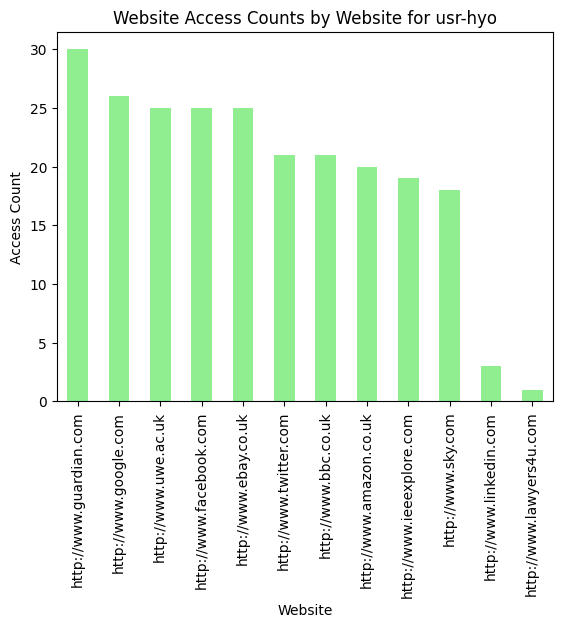

In [15]:
# Plotting website access counts by website
web_counts = web_data_filtered['website'].value_counts()
web_counts.plot(kind='bar', color='lightgreen')
plt.title('Website Access Counts by Website for usr-hyo')
plt.xlabel('Website')
plt.ylabel('Access Count')
plt.show()


# General Investigation Continues

In [ ]:
dfEF = pd.merge(file_data,employee_data)
dfEF

datetime     user              filename  month  \
0       2022-01-01 00:13:10.383255  usr-lfl             /security      1   
1       2022-01-01 00:25:35.042688  usr-lfl                 /docs      1   
2       2022-01-01 01:05:57.811233  usr-lfl               /system      1   
3       2022-01-01 01:08:59.102051  usr-lfl                  /bin      1   
4       2022-01-01 01:14:34.940124  usr-lfl             /security      1   
...                            ...      ...                   ...    ...   
3806345 2022-10-31 22:41:01.892371  usr-dmi         /private/FYEO     10   
3806346 2022-10-31 22:44:29.632840  usr-dmi     /private/staffpay     10   
3806347 2022-10-31 22:45:37.900253  usr-dmi      /docs/employment     10   
3806348 2022-10-31 22:51:34.270111  usr-dmi  /private/staffreview     10   
3806349 2022-10-31 23:07:35.706172  usr-dmi      /docs/employment     10   

         hours hour_categories       role                email    pc  
0            0        midnight  Technical  usr-lfl@uwetech.com  pc18  
1            0        midnight  Technical  usr-lfl@uwetech.com  pc18  
2            1         morning  Technical  usr-lfl@uwetech.com  pc18  
3            1         morning  Technical  usr-lfl@uwetech.com  pc18  
4            1         morning  Technical  usr-lfl@uwetech.com  pc18  
...        ...             ...        ...                  ...   ...  
3806345     22         evening   Director  usr-dmi@uwetech.com  pc17  
3806346     22         evening   Director  usr-dmi@uwetech.com  pc17  
3806347     22         evening   Director  usr-dmi@uwetech.com  pc17  
3806348     22         evening   Director  usr-dmi@uwetech.com  pc17  
3806349     23         evening   Director  usr-dmi@uwetech.com  pc17  

[3806350 rows x 9 columns]

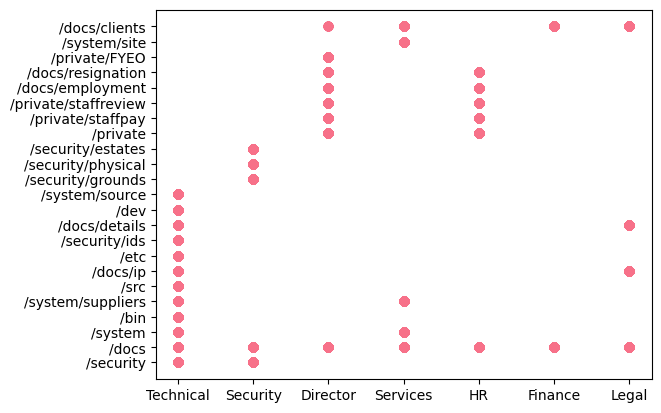

In [ ]:
plt.scatter(dfEF['role'],dfEF['filename'])

In [ ]:
dfEW = pd.merge(web_data, employee_data)
dfEW

datetime     user                       website  \
0       2022-01-01 00:14:48.945019  usr-lfl       http://www.amazon.co.uk   
1       2022-01-01 00:32:34.052436  usr-lfl      http://www.kalilinux.com   
2       2022-01-01 00:45:38.065359  usr-lfl  http://www.stackoverflow.com   
3       2022-01-01 00:46:14.392505  usr-lfl      http://www.wireshark.com   
4       2022-01-01 00:52:59.982806  usr-lfl       http://www.icancode.com   
...                            ...      ...                           ...   
2500875 2022-10-31 08:57:46.508588  usr-hhe       http://www.facebook.com   
2500876 2022-10-31 16:20:47.328301  usr-hhe       http://www.guardian.com   
2500877 2022-10-31 16:52:16.738766  usr-hhe  http://www.findmyguard.co.uk   
2500878 2022-10-31 18:49:50.458592  usr-hhe  http://www.findmyguard.co.uk   
2500879 2022-10-31 20:06:30.118864  usr-hhe         http://www.google.com   

         hours hour_categories       role                email    pc  
0            0        midnight  Technical  usr-lfl@uwetech.com  pc18  
1            0        midnight  Technical  usr-lfl@uwetech.com  pc18  
2            0        midnight  Technical  usr-lfl@uwetech.com  pc18  
3            0        midnight  Technical  usr-lfl@uwetech.com  pc18  
4            0        midnight  Technical  usr-lfl@uwetech.com  pc18  
...        ...             ...        ...                  ...   ...  
2500875      8         morning   Security  usr-hhe@uwetech.com   pc1  
2500876     16       afternoon   Security  usr-hhe@uwetech.com   pc1  
2500877     16       afternoon   Security  usr-hhe@uwetech.com   pc1  
2500878     18       afternoon   Security  usr-hhe@uwetech.com   pc1  
2500879     20         evening   Security  usr-hhe@uwetech.com   pc1  

[2500880 rows x 8 columns]

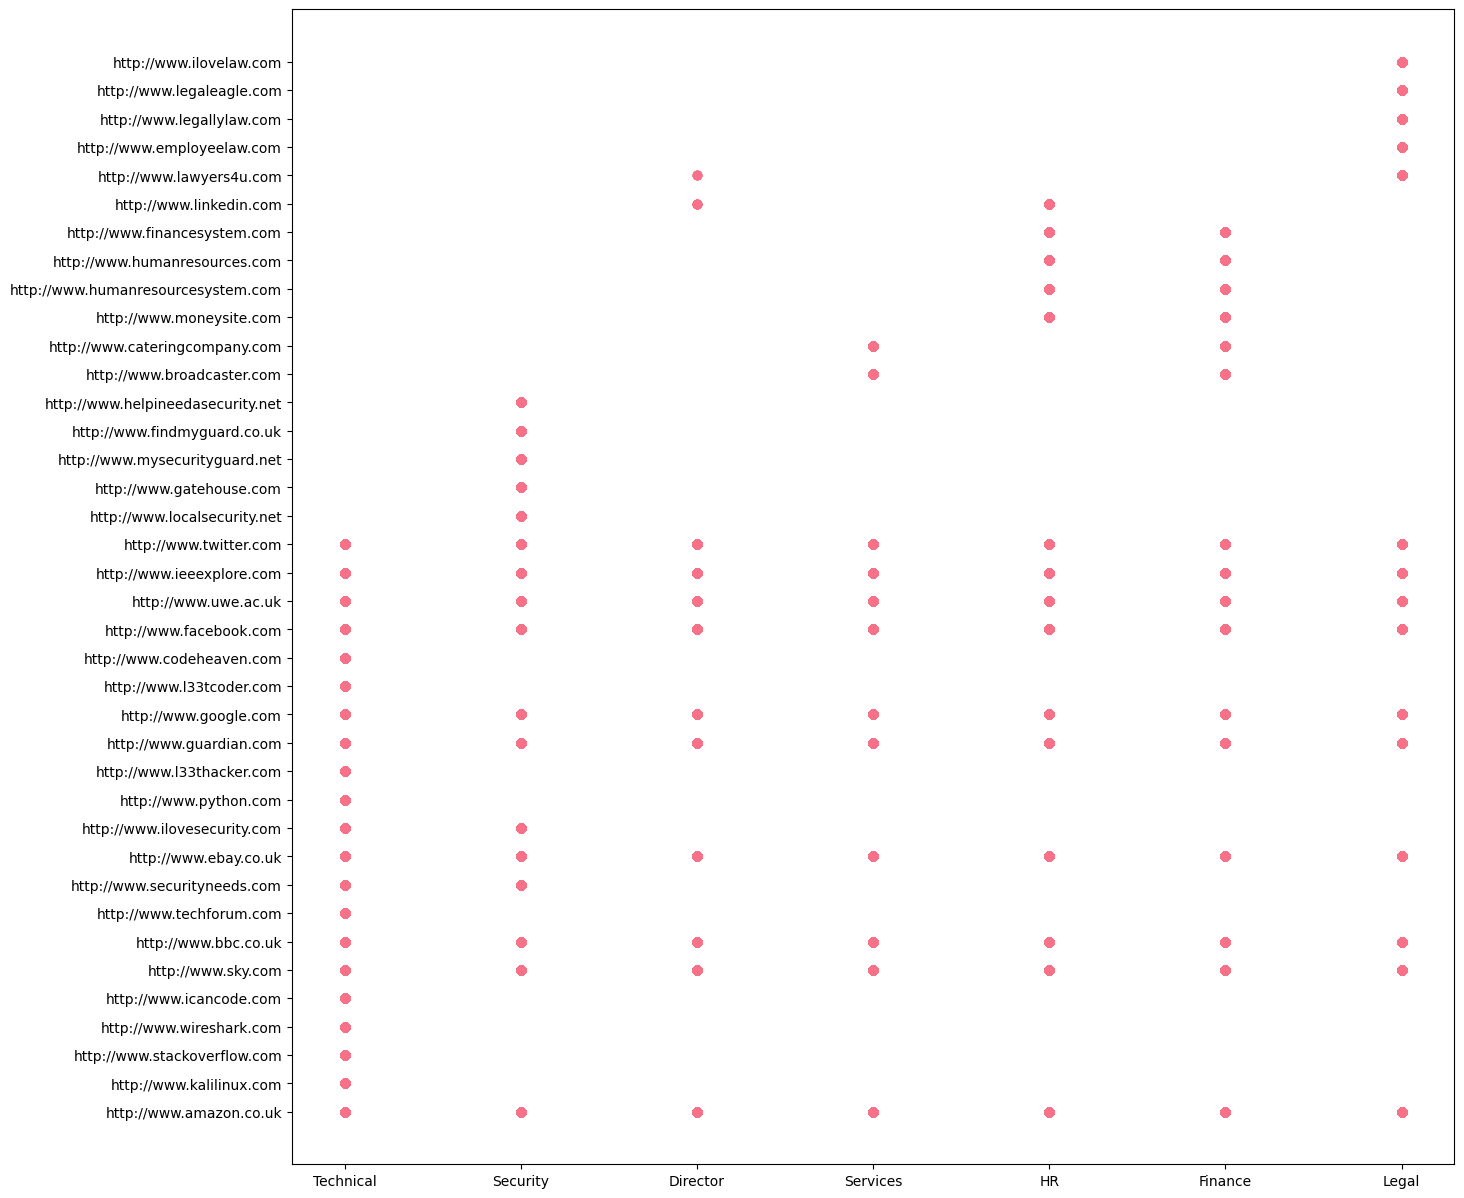

In [ ]:
plt.figure(figsize=(15,15))
plt.scatter(dfEW['role'],dfEW['website'])

# Unsupervised Machine Learning

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
merged_data = pd.concat([email_data, web_data, file_data, usb_data, login_data], axis=1)

In [ ]:
merged_data

datetime               sender            recipient  \
0       2022-01-01 00:11:41.255174  usr-lfl@uwetech.com  usr-mvr@uwetech.com   
1       2022-01-01 00:11:43.988351  usr-vul@uwetech.com  usr-vxr@uwetech.com   
2       2022-01-01 00:19:56.302656  usr-lfl@uwetech.com  usr-tgw@uwetech.com   
3       2022-01-01 00:20:23.641053  usr-hvd@uwetech.com  usr-qjv@uwetech.com   
4       2022-01-01 00:20:48.532242  usr-ebj@uwetech.com  usr-tgw@uwetech.com   
...                            ...                  ...                  ...   
3717746 2022-10-31 23:21:34.266269  usr-stu@uwetech.com  usr-ocw@uwetech.com   
3717747 2022-10-31 23:23:56.265237  usr-kdj@uwetech.com  usr-gok@uwetech.com   
3717748 2022-10-31 23:39:20.363999  usr-gvw@uwetech.com  usr-orw@uwetech.com   
3717749 2022-10-31 23:40:36.468829  usr-gvw@uwetech.com  usr-zwd@uwetech.com   
3717750 2022-10-31 23:46:24.684210  usr-ypo@uwetech.com  usr-xvg@uwetech.com   

        formatted_date sender_user hours hour_categories  \
0           2022-01-01     usr-lfl     0        midnight   
1           2022-01-01     usr-vul     0        midnight   
2           2022-01-01     usr-lfl     0        midnight   
3           2022-01-01     usr-hvd     0        midnight   
4           2022-01-01     usr-ebj     0        midnight   
...                ...         ...   ...             ...   
3717746     2022-10-31     usr-stu    23         evening   
3717747     2022-10-31     usr-kdj    23         evening   
3717748     2022-10-31     usr-gvw    23         evening   
3717749     2022-10-31     usr-gvw    23         evening   
3717750     2022-10-31     usr-ypo    23         evening   

                          datetime     user                       website  \
0       2022-01-01 00:14:48.945019  usr-lfl       http://www.amazon.co.uk   
1       2022-01-01 00:28:21.952049  usr-ebj         http://www.python.com   
2       2022-01-01 00:28:35.884593  usr-duj  http://www.localsecurity.net   
3       2022-01-01 00:29:02.986213  usr-hvd         http://www.google.com   
4       2022-01-01 00:29:05.819633  usr-hvd      http://www.wireshark.com   
...                            ...      ...                           ...   
3717746                        NaT      NaN                           NaN   
3717747                        NaT      NaN                           NaN   
3717748                        NaT      NaN                           NaN   
3717749                        NaT      NaN                           NaN   
3717750                        NaT      NaN                           NaN   

         ...     pc hours hour_categories            datetime     user  \
0        ...  pc108   0.0        midnight 2022-01-01 00:00:30  usr-lfl   
1        ...  pc108   0.0        midnight 2022-01-01 00:09:21  usr-vul   
2        ...  pc108   0.0        midnight 2022-01-01 00:14:04  usr-jmr   
3        ...  pc108   0.0        midnight 2022-01-01 00:15:06  usr-hvd   
4        ...  pc108   0.0        midnight 2022-01-01 00:15:57  usr-ebj   
...      ...    ...   ...             ...                 ...      ...   
3717746  ...    NaN   NaN             NaN                 NaT      NaN   
3717747  ...    NaN   NaN             NaN                 NaT      NaN   
3717748  ...    NaN   NaN             NaN                 NaT      NaN   
3717749  ...    NaN   NaN             NaN                 NaT      NaN   
3717750  ...    NaN   NaN             NaN                 NaT      NaN   

         action     pc month hours hour_categories  
0         login   pc18   1.0   0.0        midnight  
1         login   pc54   1.0   0.0        midnight  
2         login  pc137   1.0   0.0        midnight  
3         login  pc110   1.0   0.0        midnight  
4         login  pc108   1.0   0.0        midnight  
...         ...    ...   ...   ...             ...  
3717746     NaN    NaN   NaN   NaN             NaN  
3717747     NaN    NaN   NaN   NaN             NaN  
3717748     NaN    NaN   NaN   NaN             NaN  


In [ ]:
# Identify and keep only the first occurrence of each duplicated column
merged_data = merged_data.loc[:, ~merged_data.columns.duplicated()]

# Optionally, drop specific columns that you don't want to keep
# For example, dropping 'formatted_date' and 'month' columns
columns_to_drop = ['formatted_date', 'month']
merged_data = merged_data.drop(columns_to_drop, axis=1)

In [ ]:
merged_data.isnull().sum()

datetime                 0
sender                   0
recipient                0
sender_user              0
hours                    0
hour_categories          0
user               1287123
website            1287123
filename              5823
action             2931909
pc                 2931909
dtype: int64

In [ ]:
#Drop unnecessary columns  
merged_data = merged_data.drop(['filename','website'],axis=1)

In [ ]:
merged_data['datetime'] = pd.to_datetime(merged_data['datetime'])

In [ ]:
# Extract features
merged_data['day_of_week'] = merged_data['datetime'].dt.dayofweek
merged_data['month'] = merged_data['datetime'].dt.month
merged_data

datetime               sender            recipient  \
0       2022-01-01 00:11:41.255174  usr-lfl@uwetech.com  usr-mvr@uwetech.com   
1       2022-01-01 00:11:43.988351  usr-vul@uwetech.com  usr-vxr@uwetech.com   
2       2022-01-01 00:19:56.302656  usr-lfl@uwetech.com  usr-tgw@uwetech.com   
3       2022-01-01 00:20:23.641053  usr-hvd@uwetech.com  usr-qjv@uwetech.com   
4       2022-01-01 00:20:48.532242  usr-ebj@uwetech.com  usr-tgw@uwetech.com   
...                            ...                  ...                  ...   
3717746 2022-10-31 23:21:34.266269  usr-stu@uwetech.com  usr-ocw@uwetech.com   
3717747 2022-10-31 23:23:56.265237  usr-kdj@uwetech.com  usr-gok@uwetech.com   
3717748 2022-10-31 23:39:20.363999  usr-gvw@uwetech.com  usr-orw@uwetech.com   
3717749 2022-10-31 23:40:36.468829  usr-gvw@uwetech.com  usr-zwd@uwetech.com   
3717750 2022-10-31 23:46:24.684210  usr-ypo@uwetech.com  usr-xvg@uwetech.com   

        sender_user  hours hour_categories     user      action     pc  \
0           usr-lfl      0        midnight  usr-lfl  usb_insert  pc108   
1           usr-vul      0        midnight  usr-ebj  usb_insert  pc108   
2           usr-lfl      0        midnight  usr-duj  usb_insert  pc108   
3           usr-hvd      0        midnight  usr-hvd  usb_remove  pc108   
4           usr-ebj      0        midnight  usr-hvd  usb_remove  pc108   
...             ...    ...             ...      ...         ...    ...   
3717746     usr-stu     23         evening      NaN         NaN    NaN   
3717747     usr-kdj     23         evening      NaN         NaN    NaN   
3717748     usr-gvw     23         evening      NaN         NaN    NaN   
3717749     usr-gvw     23         evening      NaN         NaN    NaN   
3717750     usr-ypo     23         evening      NaN         NaN    NaN   

         day_of_week  month  
0                  5      1  
1                  5      1  
2                  5      1  
3                  5      1  
4                  5      1  
...              ...    ...  
3717746            0     10  
3717747            0     10  
3717748            0     10  
3717749            0     10  
3717750            0     10  

[3717751 rows x 11 columns]

In [ ]:
merged_data = merged_data.drop(['datetime'],axis=1)

In [ ]:
merged_data.isnull().sum()

sender                   0
recipient                0
sender_user              0
hours                    0
hour_categories          0
user               1287123
action             2931909
pc                 2931909
day_of_week              0
month                    0
dtype: int64

In [ ]:
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Assuming cat_cols is a list of categorical column names
cat_cols = ['sender', 'recipient', 'sender_user', 'hour_categories']

# Convert categorical variables to numerical representations
label_encoder = LabelEncoder()
for col in cat_cols:
    merged_data[col] = label_encoder.fit_transform(merged_data[col])

# Impute 'user' using KNN
knn_imputer = KNNImputer(n_neighbors=5)
merged_data['user'] = knn_imputer.fit_transform(merged_data.drop(['user', 'action', 'pc'], axis=1))

# Impute 'action' and 'pc' using mode
imputer = SimpleImputer(strategy='most_frequent')
merged_data['action'] = imputer.fit_transform(merged_data[['action']])
merged_data['pc'] = imputer.fit_transform(merged_data[['pc']])


In [ ]:
merged_data.isnull().sum()

sender             0
recipient          0
sender_user        0
hours              0
hour_categories    0
user               0
action             0
pc                 0
day_of_week        0
month              0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Apply label encoding to specific columns
merged_data['hour_categories_encoded'] = label_encoder.fit_transform(merged_data['hour_categories'])
merged_data['user_encoded'] = label_encoder.fit_transform(merged_data['user'])
merged_data['sender_user_encoded'] = label_encoder.fit_transform(merged_data['sender_user'])
merged_data['pc_encoded'] = label_encoder.fit_transform(merged_data['pc'])


In [ ]:
#One-Hot Encoding
merged_data = pd.get_dummies(merged_data, columns=['action'], prefix='action')


In [ ]:
merged_data.columns

Index(['sender', 'recipient', 'sender_user', 'hours', 'hour_categories',
       'user', 'pc', 'day_of_week', 'month', 'hour_categories_encoded',
       'user_encoded', 'sender_user_encoded', 'pc_encoded',
       'action_usb_insert', 'action_usb_remove'],
      dtype='object')

In [ ]:
ml_data = merged_data.drop(['sender','recipient','sender_user','hour_categories','user','pc'],axis=1)
ml_data

hours  day_of_week  month  hour_categories_encoded  user_encoded  \
0            0            5      1                        2            94   
1            0            5      1                        2           204   
2            0            5      1                        2            94   
3            0            5      1                        2            65   
4            0            5      1                        2            27   
...        ...          ...    ...                      ...           ...   
3717746     23            0     10                        1           171   
3717747     23            0     10                        1            89   
3717748     23            0     10                        1            48   
3717749     23            0     10                        1            48   
3717750     23            0     10                        1           235   

         sender_user_encoded  pc_encoded  action_usb_insert  action_usb_remove  
0                         94           7                  1                  0  
1                        204           7                  1                  0  
2                         94           7                  1                  0  
3                         65           7                  0                  1  
4                         27           7                  0                  1  
...                      ...         ...                ...                ...  
3717746                  171         160                  1                  0  
3717747                   89         160                  1                  0  
3717748                   48         160                  1                  0  
3717749                   48         160                  1                  0  
3717750                  235         160                  1                  0  

[3717751 rows x 9 columns]

In [ ]:
ml_data.isnull().sum()

hours                      0
day_of_week                0
month                      0
hour_categories_encoded    0
user_encoded               0
sender_user_encoded        0
pc_encoded                 0
action_usb_insert          0
action_usb_remove          0
dtype: int64

In [ ]:
ml_data.head()

hours  day_of_week  month  hour_categories_encoded  user_encoded  \
0      0            5      1                        2            94   
1      0            5      1                        2           204   
2      0            5      1                        2            94   
3      0            5      1                        2            65   
4      0            5      1                        2            27   

   sender_user_encoded  pc_encoded  action_usb_insert  action_usb_remove  \
0                   94           7                  1                  0   
1                  204           7                  1                  0   
2                   94           7                  1                  0   
3                   65           7                  0                  1   
4                   27           7                  0                  1   

   cluster  outlier  combined_action  
0        0        1                1  
1        0       -1                1  
2        0        1                1  
3        2       -1                1  
4        2       -1                1

In [ ]:
ml_data.columns

Index(['hours', 'day_of_week', 'month', 'hour_categories_encoded',
       'user_encoded', 'sender_user_encoded', 'pc_encoded',
       'action_usb_insert', 'action_usb_remove', 'cluster', 'outlier',
       'combined_action'],
      dtype='object')

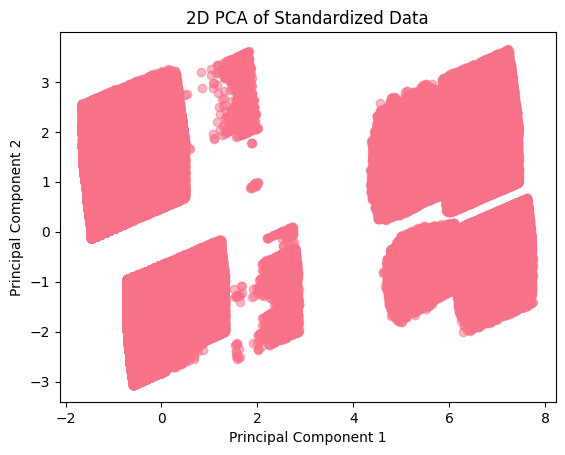

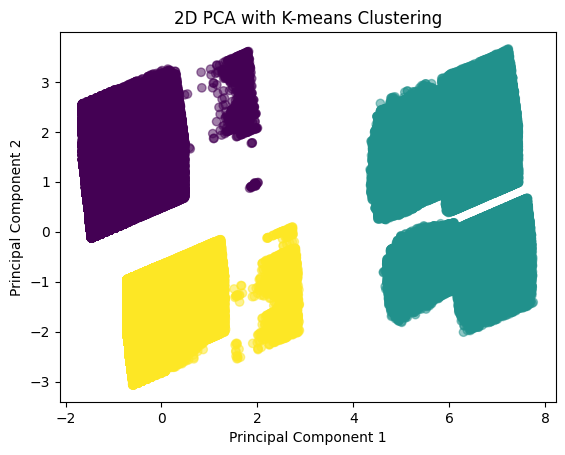

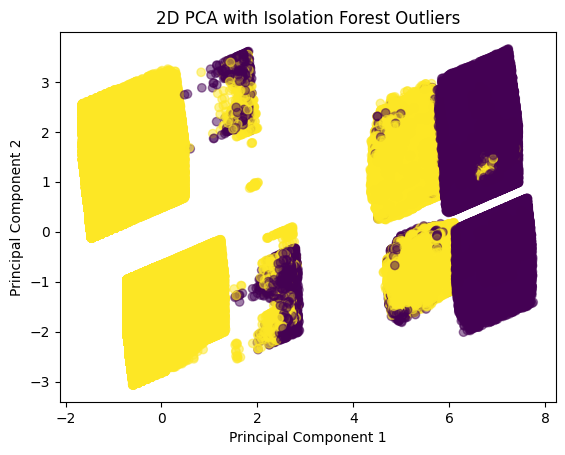

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

# Standardize the data
scaler = StandardScaler()
ml_data_standardized = scaler.fit_transform(ml_data)

# Apply Principal Component Analysis (PCA) for dimensionality reduction
pca = PCA(n_components=2)
ml_data_pca = pca.fit_transform(ml_data_standardized)

# Plot the data in 2D after PCA
plt.scatter(ml_data_pca[:, 0], ml_data_pca[:, 1], alpha=0.5)
plt.title('2D PCA of Standardized Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
ml_data['cluster'] = kmeans.fit_predict(ml_data_standardized)

# Visualize the clusters in 2D after PCA
plt.scatter(ml_data_pca[:, 0], ml_data_pca[:, 1], c=ml_data['cluster'], cmap='viridis', alpha=0.5)
plt.title('2D PCA with K-means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Apply Isolation Forest for outlier detection
isolation_forest = IsolationForest(contamination=0.05, random_state=42)
ml_data['outlier'] = isolation_forest.fit_predict(ml_data_standardized)

# Visualize outliers in 2D after PCA
plt.scatter(ml_data_pca[:, 0], ml_data_pca[:, 1], c=ml_data['outlier'], cmap='viridis', alpha=0.5)
plt.title('2D PCA with Isolation Forest Outliers')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [ ]:
# Print the number of points in each cluster after K-means
cluster_counts = ml_data['cluster'].value_counts().sort_index()
print("Number of points in each cluster after K-means:")
print(cluster_counts)

# Print the number of outliers detected by Isolation Forest
outlier_counts = ml_data['outlier'].value_counts().sort_index()
print("\nNumber of outliers detected by Isolation Forest:")
print(outlier_counts)

# Comment on the results
print("\nComments:")
print("1. In the 2D PCA plot, check if there are distinct clusters or patterns.")
print("2. In the 2D PCA with K-means Clustering plot, observe how well the algorithm grouped similar points.")
print("3. In the 2D PCA with Isolation Forest Outliers plot, identify the points marked as outliers.")

# You can add more specific comments based on the actual numbers and patterns observed in your results.


Number of points in each cluster after K-means:
0    1918052
1     392921
2    1406778
Name: cluster, dtype: int64

Number of outliers detected by Isolation Forest:
-1     185888
 1    3531863
Name: outlier, dtype: int64

Comments:
1. In the 2D PCA plot, check if there are distinct clusters or patterns.
2. In the 2D PCA with K-means Clustering plot, observe how well the algorithm grouped similar points.
3. In the 2D PCA with Isolation Forest Outliers plot, identify the points marked as outliers.


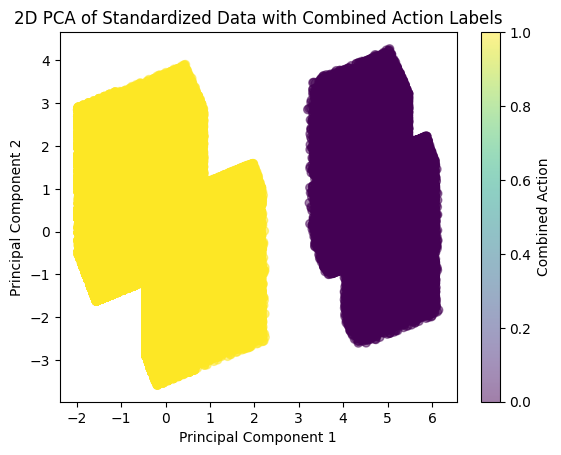

In [ ]:
import matplotlib.cm as cm

# Combine the two action columns into a single column for color encoding
ml_data['combined_action'] = (ml_data['action_usb_insert'] & ~ml_data['action_usb_remove']).astype(int)

# Use a colormap to convert combined_action values to colors
colors = cm.viridis(ml_data['combined_action'] / ml_data['combined_action'].max())

plt.scatter(ml_data_pca[:, 0], ml_data_pca[:, 1], c=colors, alpha=0.5)
plt.title('2D PCA of Standardized Data with Combined Action Labels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Combined Action')
plt.show()


### Question 7: Describe what you believe are the key findings of your investigation. You should clearly state the suspect identified, and the sequential order of suspicious events, including the date and time that these occurred. You should then provide your own critical reflection of what has occurred in this scenario, giving justification for any assumptions made. Limit your response to a maximum of 400 words. 


## FINDINGS

In the realm of cybersecurity, meticulous scrutiny of user activities is paramount to safeguarding sensitive information and preventing potential data breaches. This investigation delves into the suspicious activities of user 'usr-yho' within various data sources, shedding light on anomalous behaviors that warrant closer examination.

## USB Activity Analysis

An immediate red flag emerges as 'usr-yho' stands out as the sole director interacting with USB devices. USB insertions and removals during specific time intervals have been meticulously documented, revealing a pattern of behavior that deviates significantly from the norm. Notably, extended USB insertion periods, spanning thousands of minutes, raise concerns about potential data exfiltration.

## File Interaction Anomalies

Further examination of the 'file_data' unveils a startling revelation - 'usr-yho' is the exclusive director accessing the '/docs/clients' file. The frequency of interactions, totaling 30 instances, on a single day, 22-07-12, amplifies the anomaly. Directors typically possess restricted access to such sensitive files, prompting questions about the legitimacy of 'usr-yho's interactions and the potential compromise of confidential data.

## Login Data Examination:

Contrary to the USB and file-related anomalies, no irregularities surface in 'login_data.' 'usr-yho's login and logoff times align with established norms, and comparative analysis across directors reveals a lack of conspicuous deviations. This section provides a benchmark for normal user behavior, emphasizing the uniqueness of the observed USB and file interactions.

## Web Activity Insights


The suspect's engagement with the website 'lawyers4u.com' raises intriguing possibilities. While not inherently incriminating, this online exploration may indicate a preemptive response to an ongoing investigation, reflecting an awareness of potential scrutiny. Further monitoring of web activities and correlating findings with other data sources could reveal additional layers to the suspect's motivations.

## Email Communication Assessment

In the 'email_data' domain, no direct evidence of wrongdoing by 'usr-yho' surfaces. The act of emailing oneself, while unusual, lacks specificity as other employees exhibit similar behavior. This suggests the need for a nuanced interpretation, considering organizational norms and communication habits.

## Conclusion and Future Steps

This comprehensive analysis serves as a foundational step in uncovering potential security threats within the organization. Moving forward, a deeper dive into the contents of the USB device and scrutiny of network logs could provide a more holistic understanding of 'usr-yho's activities. Documenting analysis methods and assumptions ensures transparency, aiding in the replication of findings and the formulation of effective security measures.

In summary, the amalgamation of USB activities, file interactions, and web engagement casts a spotlight on 'usr-yho' as a prime suspect. The findings present a compelling case for further investigation, highlighting the importance of continuous vigilance in the ever-evolving landscape of cybersecurity.